In [31]:
import scanpy as sc
import squidpy as sq
import os

ImportError: cannot import name 'Coordinates' from partially initialized module 'xarray.core.coordinates' (most likely due to a circular import) (/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/xarray/core/coordinates.py)

In [2]:
import sys
sys.path.append('/home/augusta/SSS_mount/insituCNV/InSituCNV/modules')
sys.path

['/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/03_Run_inferCNV',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python311.zip',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/lib-dynload',
 '',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages',
 '/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/setuptools/_vendor',
 '/home/augusta/SSS_mount/insituCNV/InSituCNV/modules']

# Load adata

In [3]:
adata_path = "/home/augusta/SSS_mount/insituCNV/InSituCNV/Figure2/01_Simulate_CNVs_in_spatial_data/Simulate_CNVs_vascular_normal/vascular_normal_simulatedCNVs_301024.h5ad"
adata = sc.read_h5ad(adata_path)

In [4]:
adata.obs.cell_type

AAACGAAAGACTCATC-1    macrophage
AAACGAACAACGACTT-1    macrophage
AAACGCTCAGCAGGAT-1    fibroblast
AAACGCTTCCGTGTCT-1    macrophage
AAAGGATTCCAACACA-1    macrophage
                         ...    
TTTGGTTCAACAGATA-9    macrophage
TTTGTTGAGGCGTCCT-9    fibroblast
TTTGTTGTCGAACTCA-9    macrophage
TTTGTTGTCGTTAGTG-9    fibroblast
TTTGTTGTCTTGCAAG-9    fibroblast
Name: cell_type, Length: 6184, dtype: category
Categories (2, object): ['fibroblast', 'macrophage']

In [5]:
import numpy as np
adata.layers['zero'] = np.zeros(adata.X.shape)

# Preprocessing

In [6]:
sc.pp.normalize_total(adata, layer='CNV_simulated')

In [7]:
sc.pp.log1p(adata, layer='CNV_simulated')

# inferCNV

In [8]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

sc.settings.set_figure_params(figsize=(5, 5))

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Zero

In [55]:
print(adata.layers['zero'].min())
print(adata.layers['zero'].max())

0.0
0.0


In [50]:
cnv.tl.infercnv(
    adata,
    layer='zero',
    window_size=200
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.98s/it]


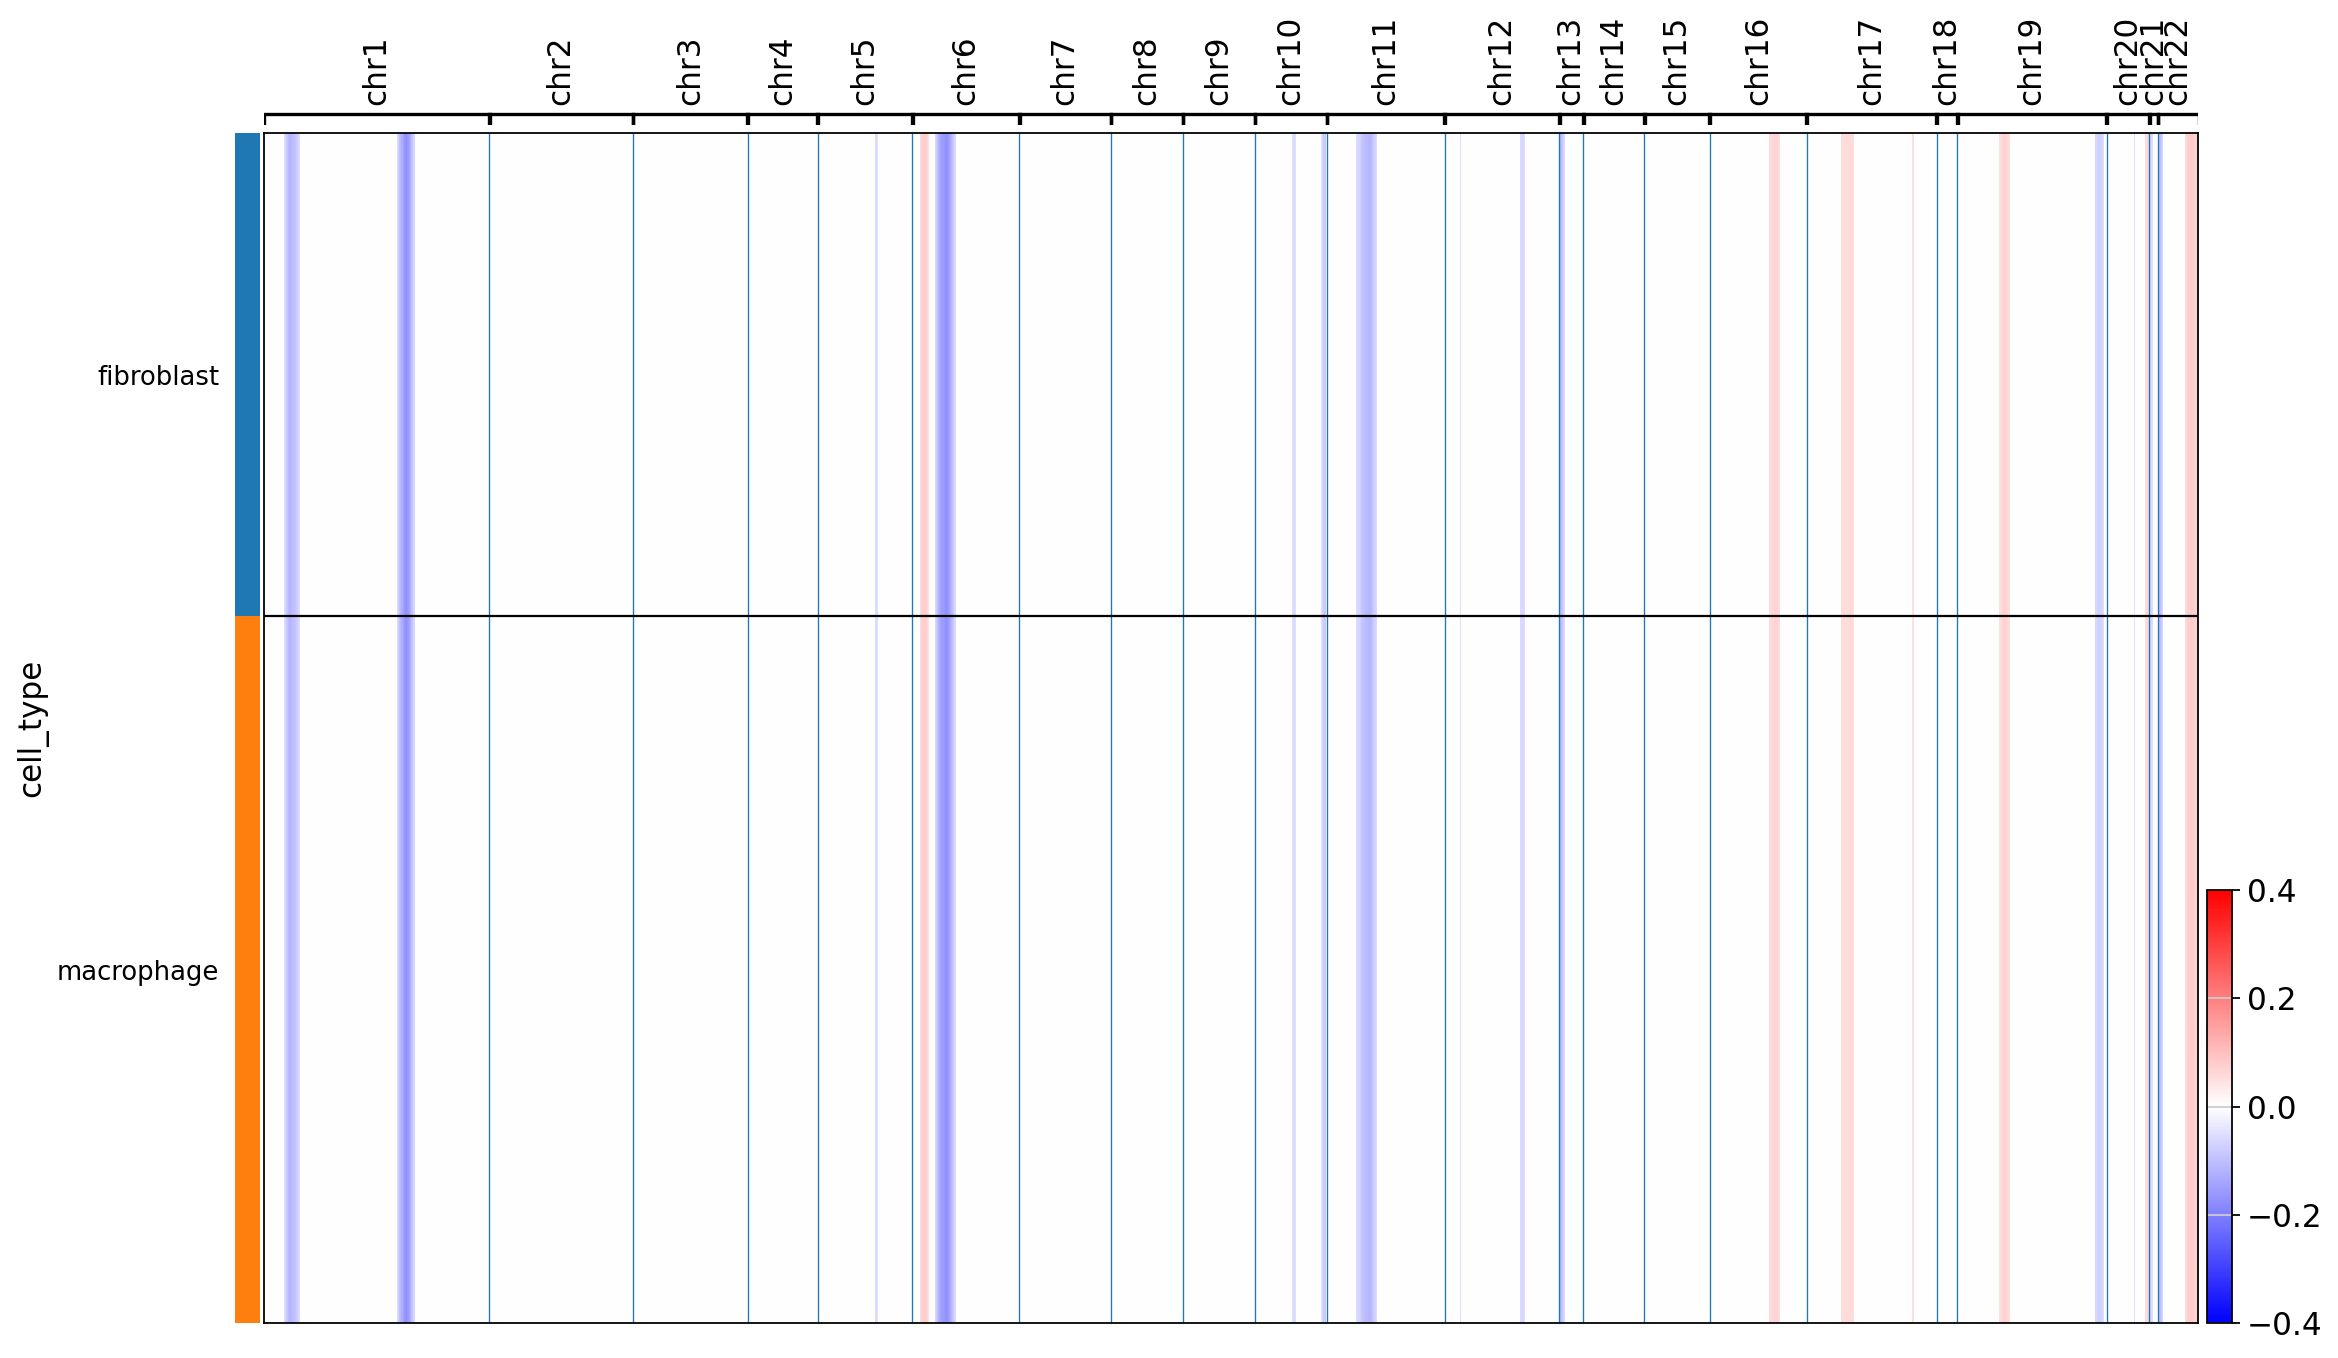

In [51]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmax=0.4, vmin=-0.4)

### GT

In [10]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='CNV_GT',
    reference_key="simulated_subclone",
    reference_cat="N",
    window_size=200
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.94s/it]


In [11]:
adata

AnnData object with n_obs × n_vars = 6184 × 22798
    obs: 'mapped_reference_annotation', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_

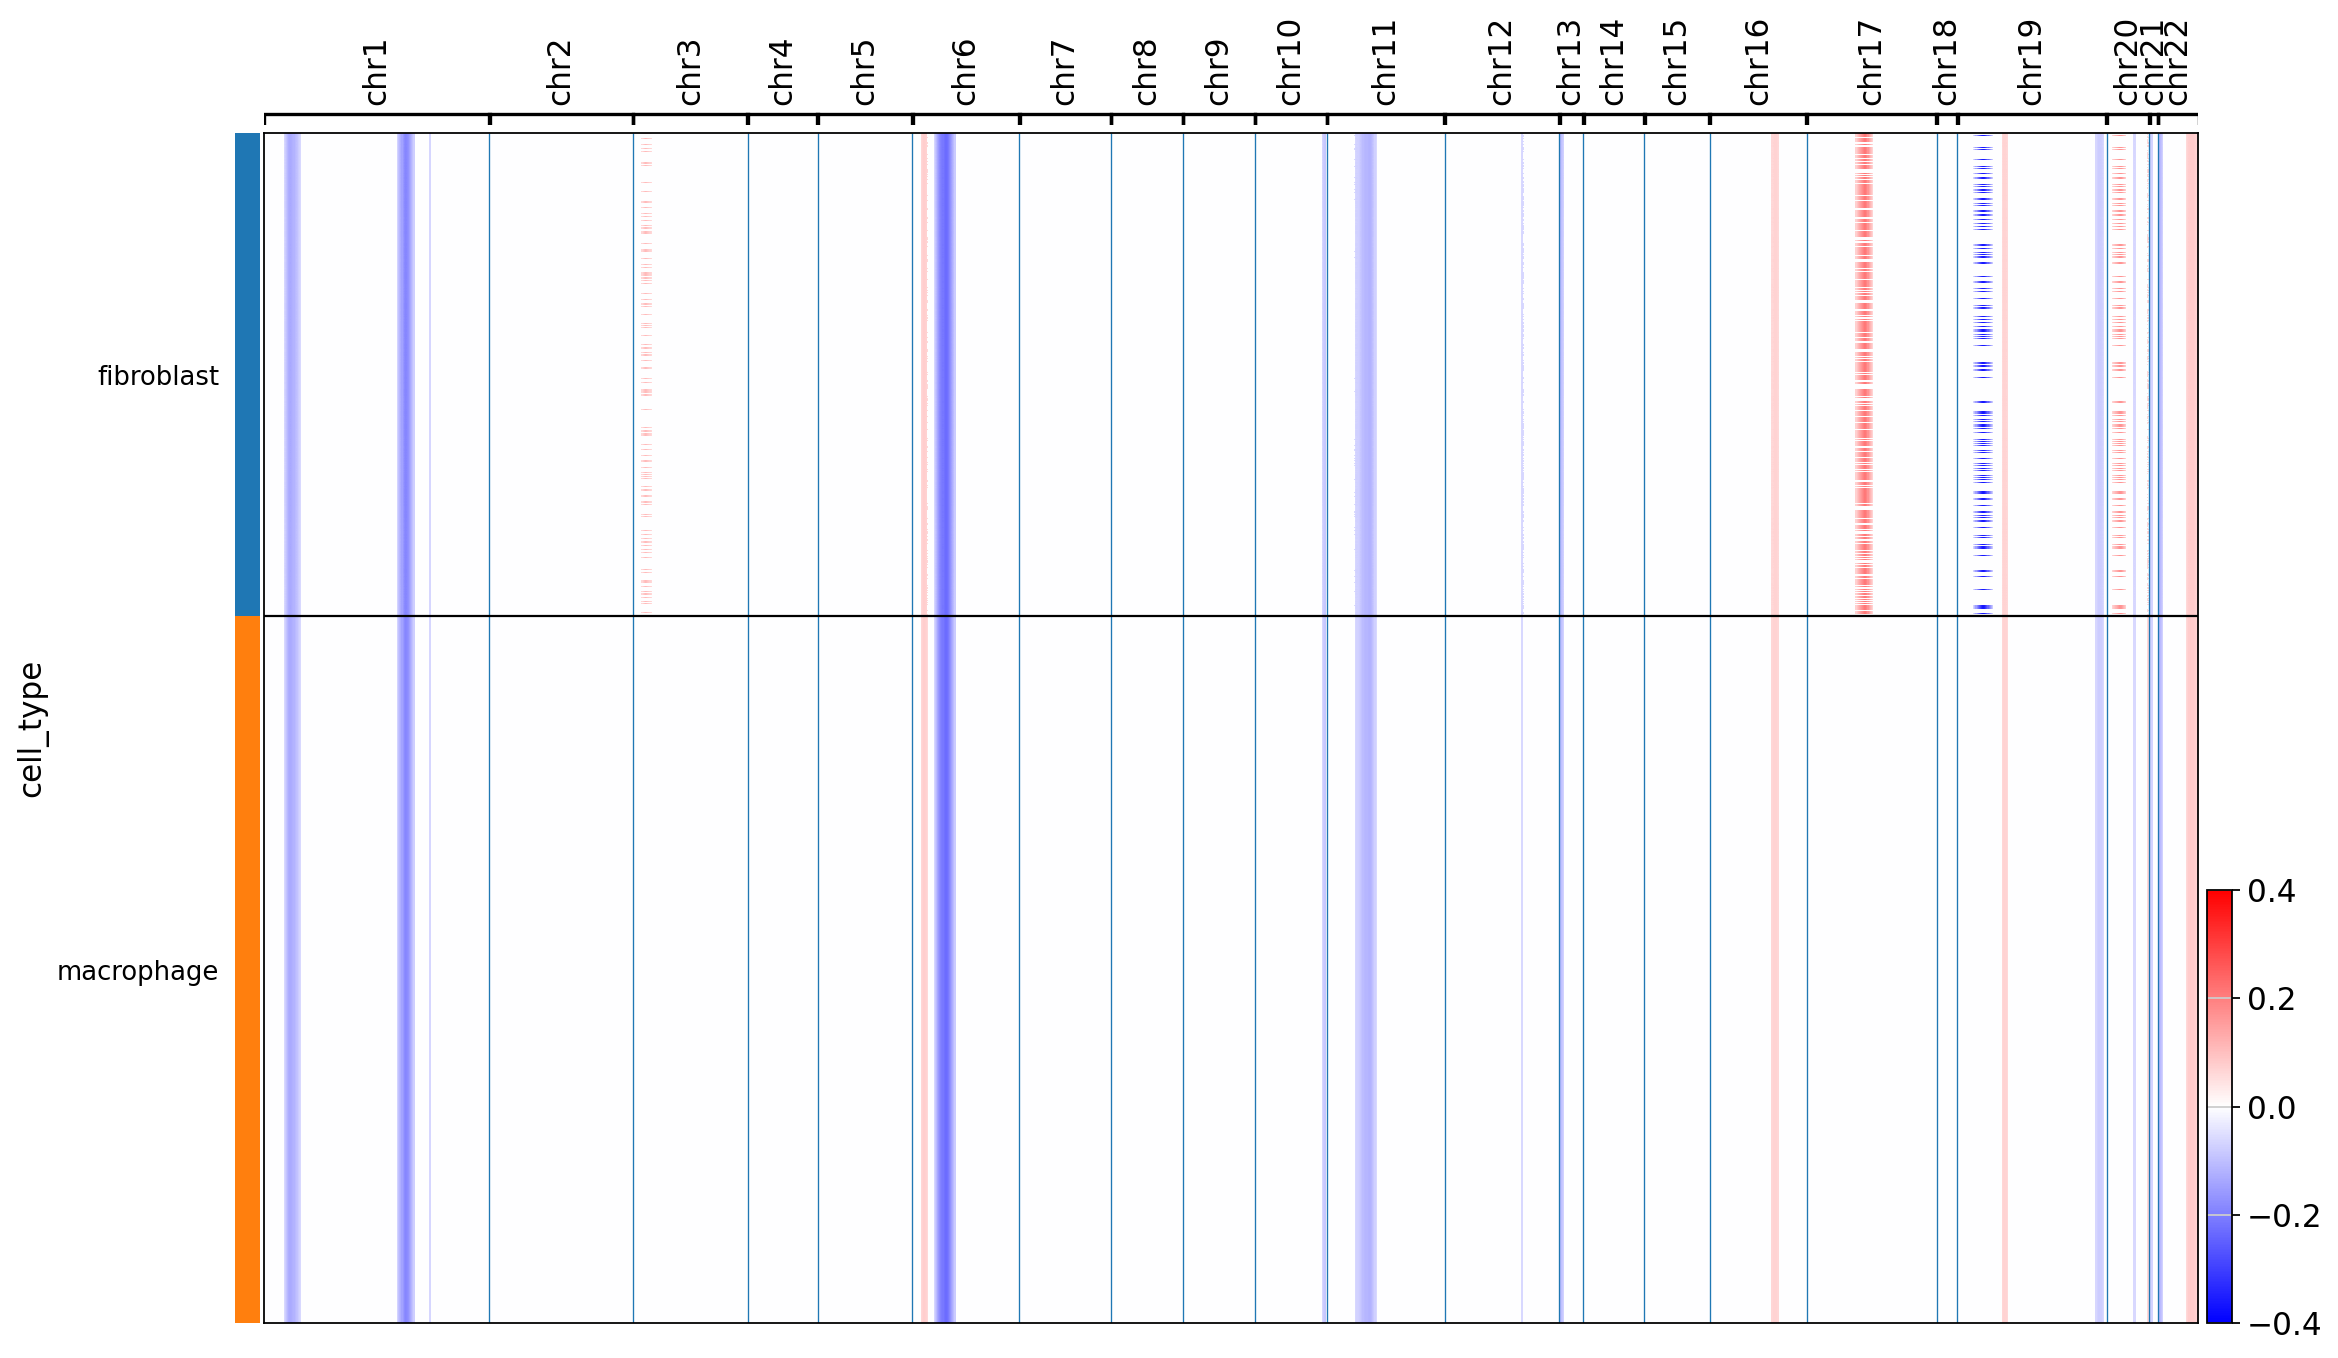

In [12]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmax=0.4, vmin=-0.4)

In [15]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


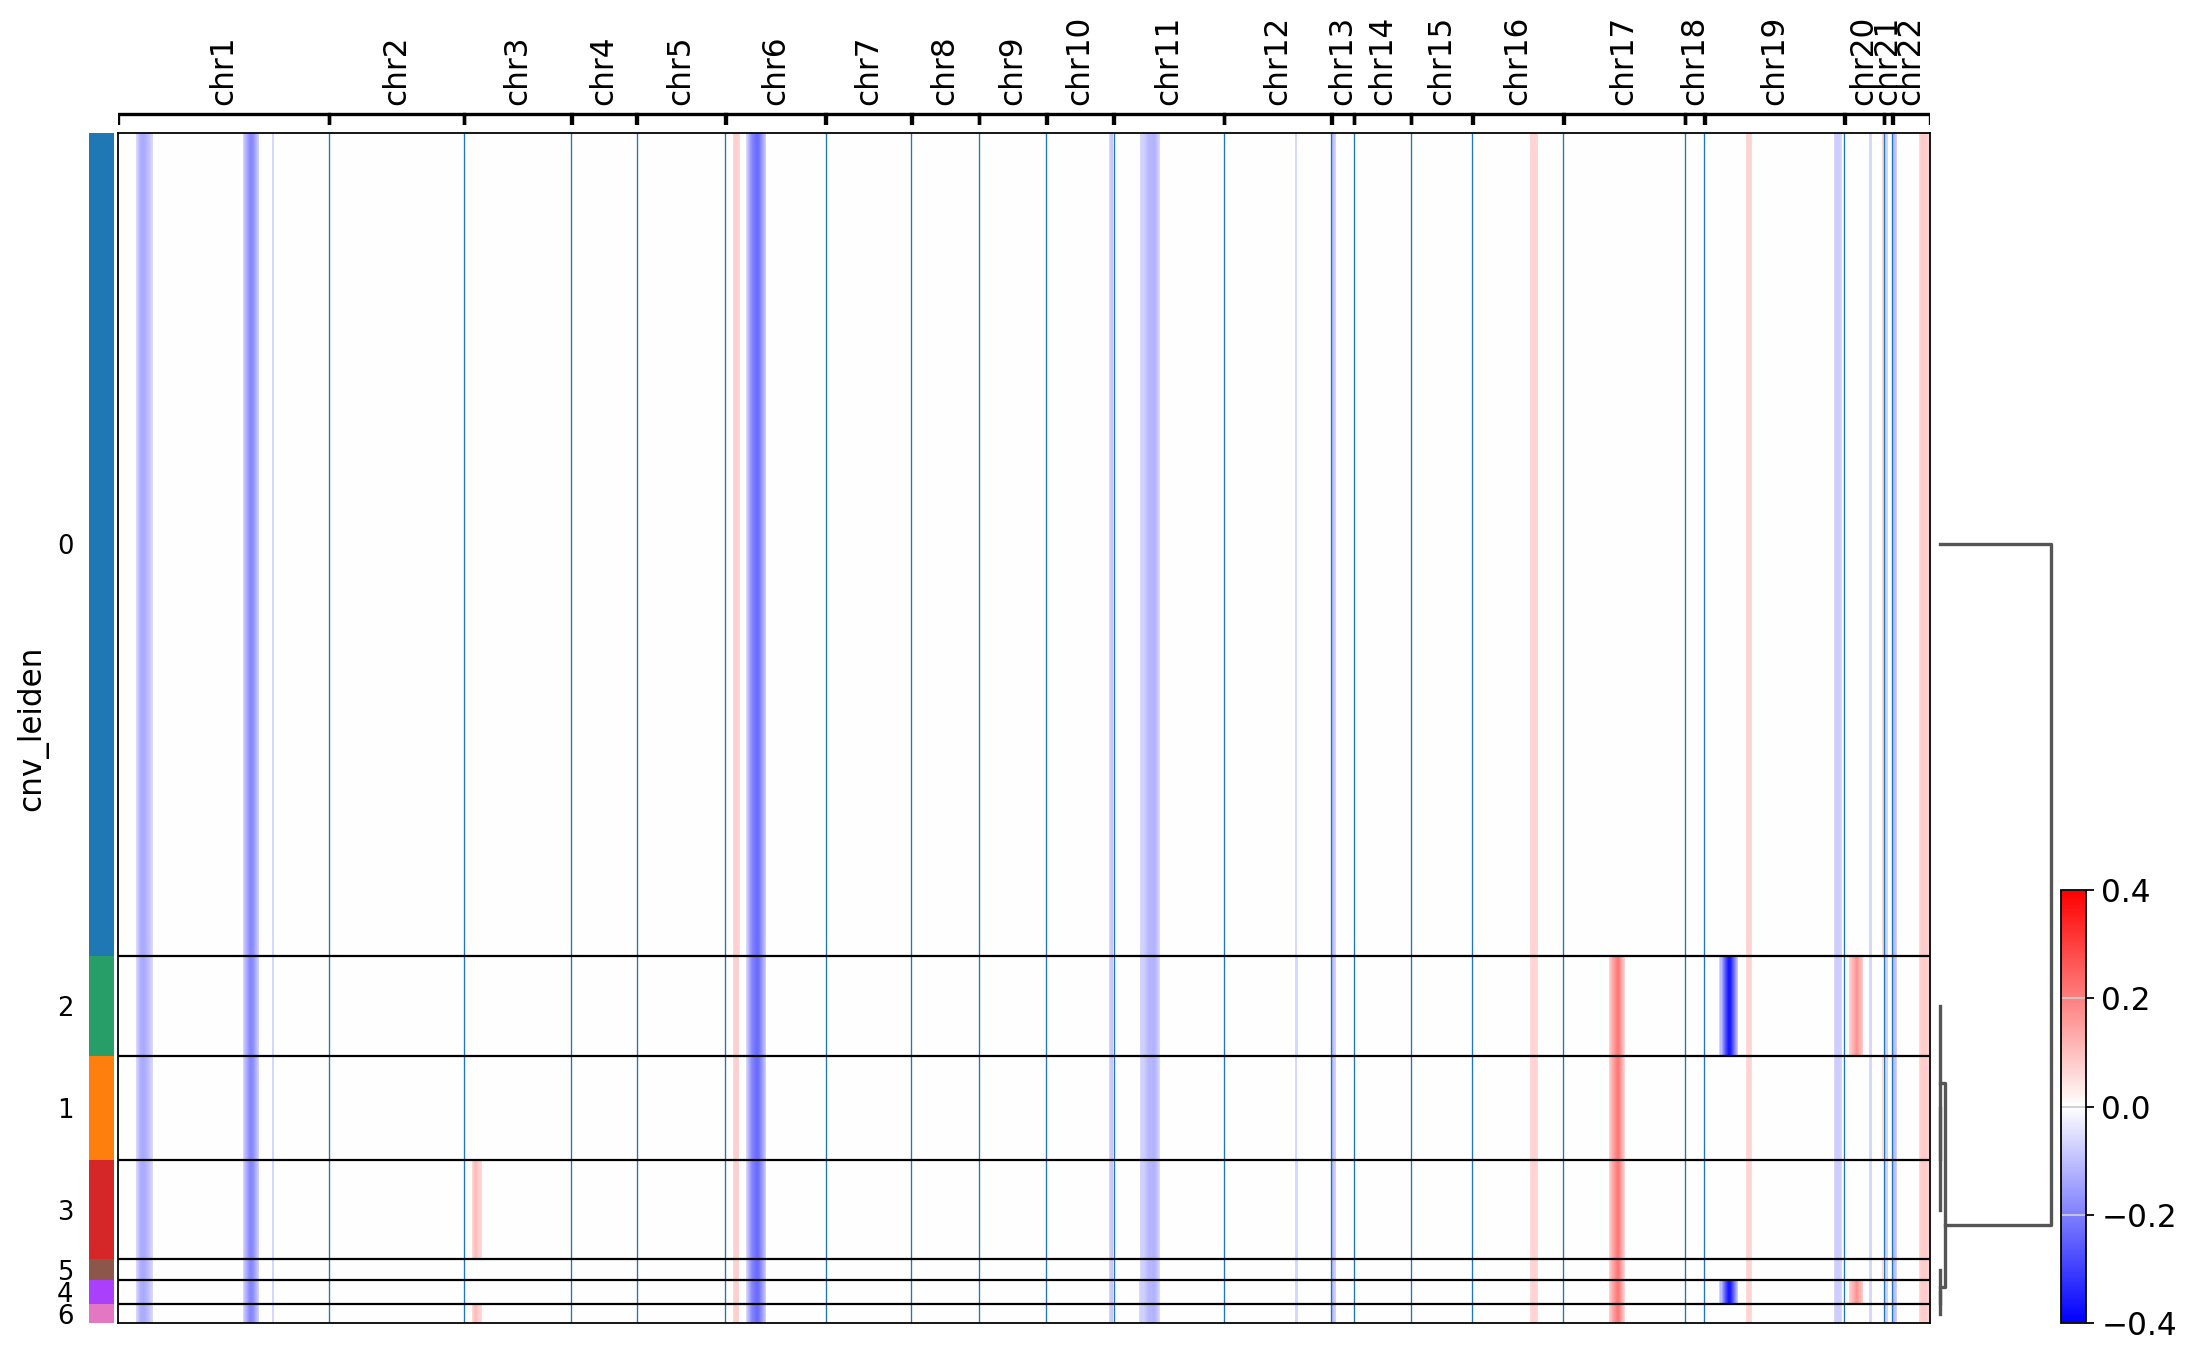

In [16]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True,  vmax=0.4, vmin=-0.4)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


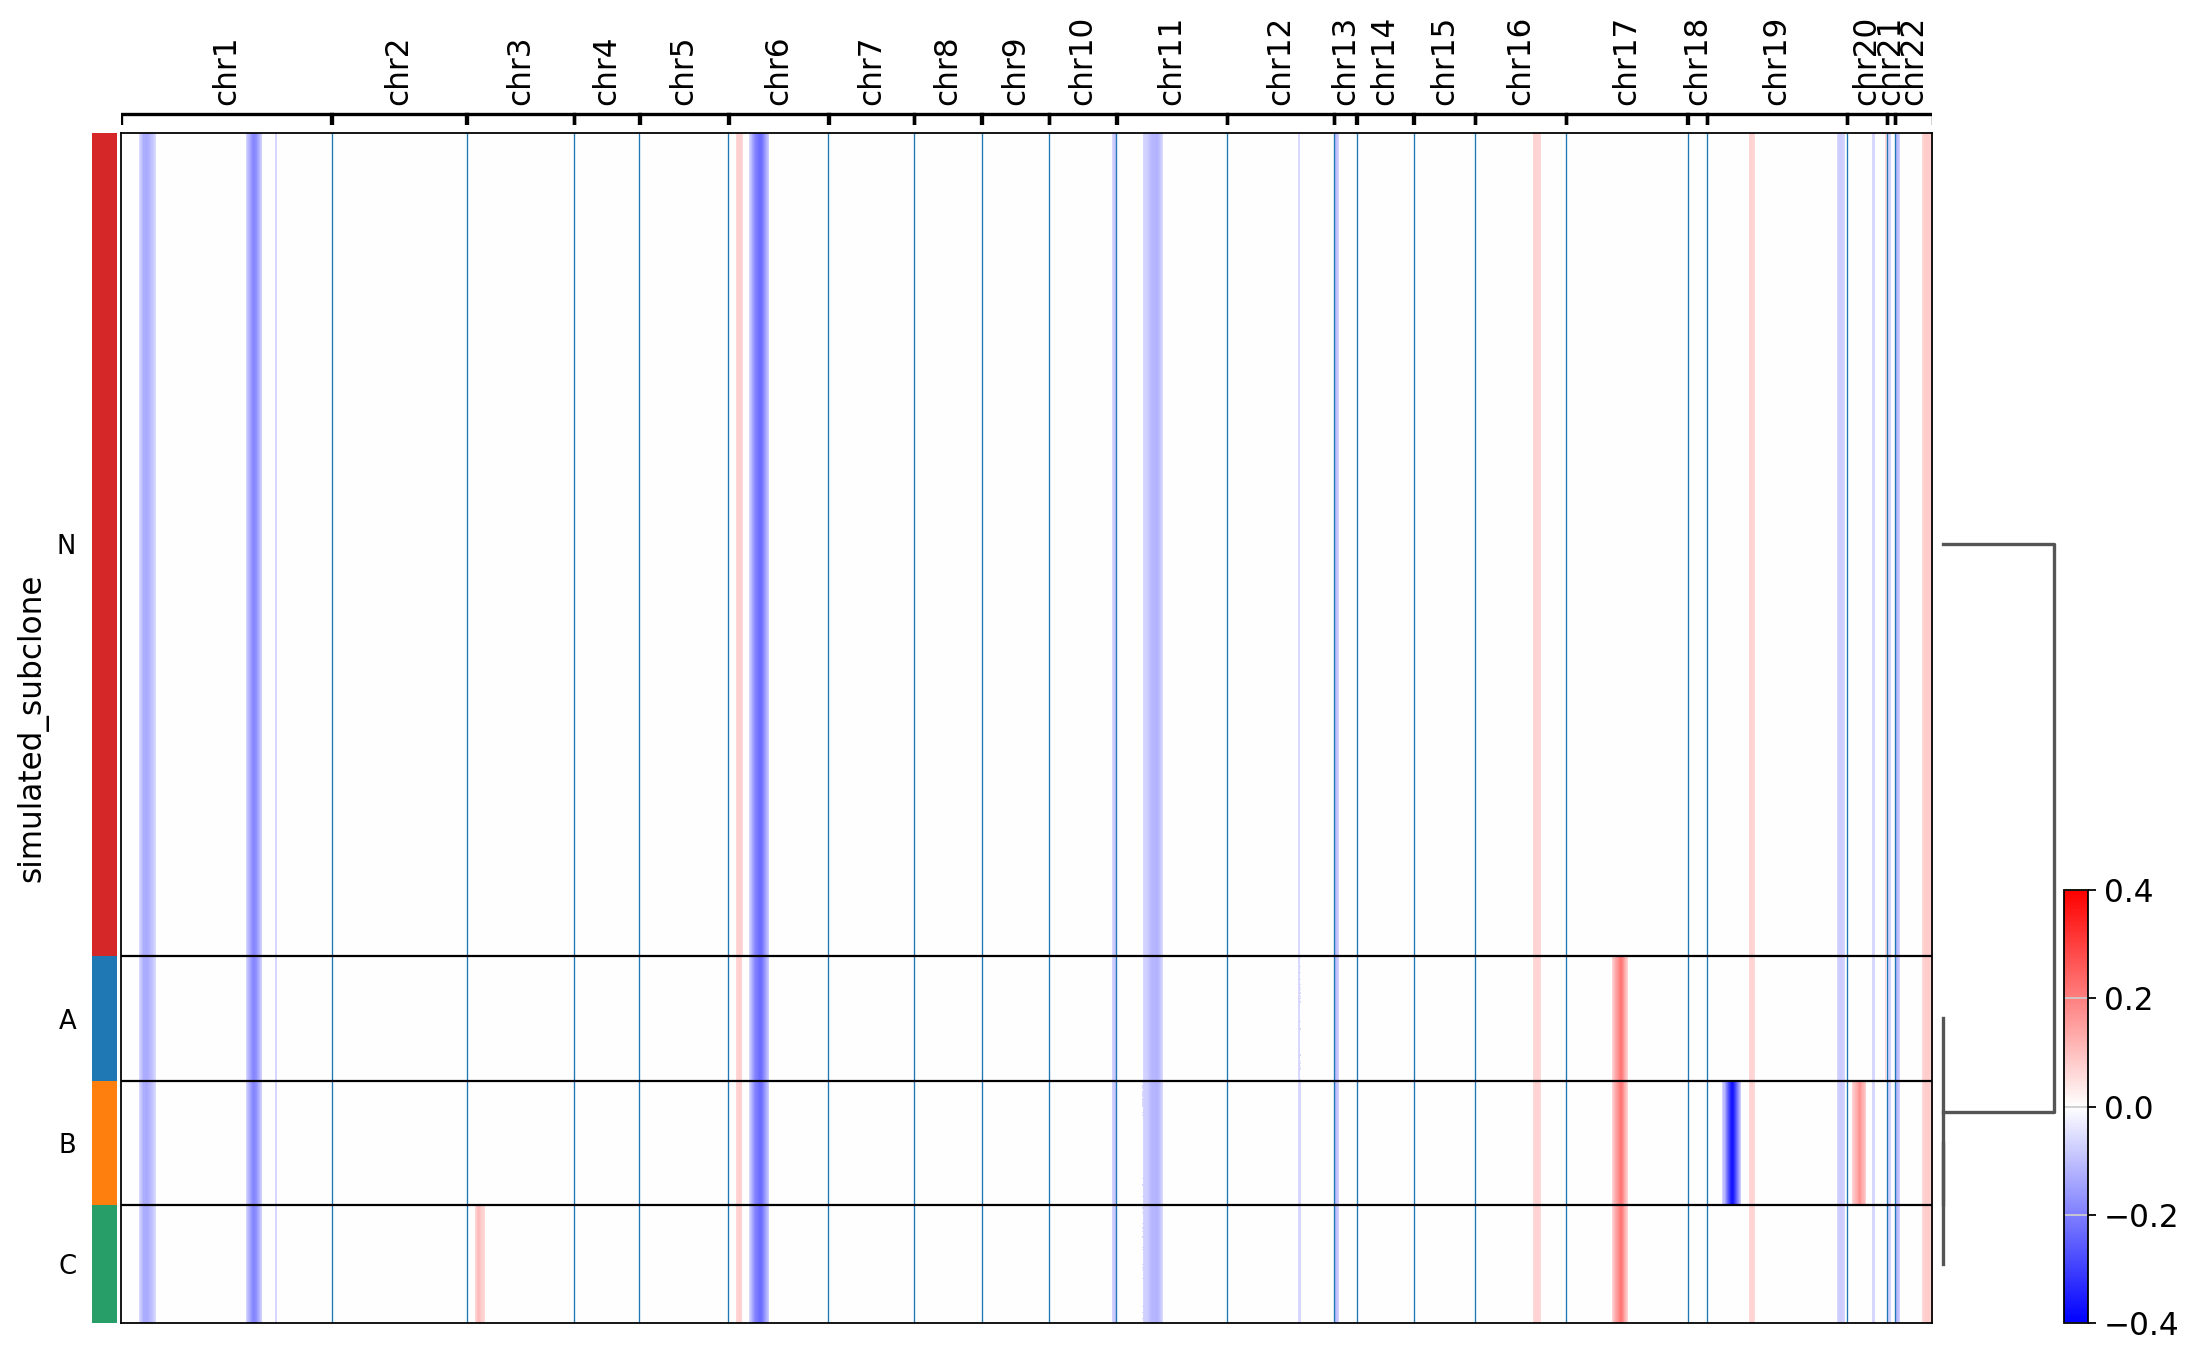

In [19]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmax=0.4, vmin=-0.4)

### Simulated

In [34]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='CNV_simulated',
    reference_key="cell_type",
    reference_cat="macrophage",
    window_size=200
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.14s/it]


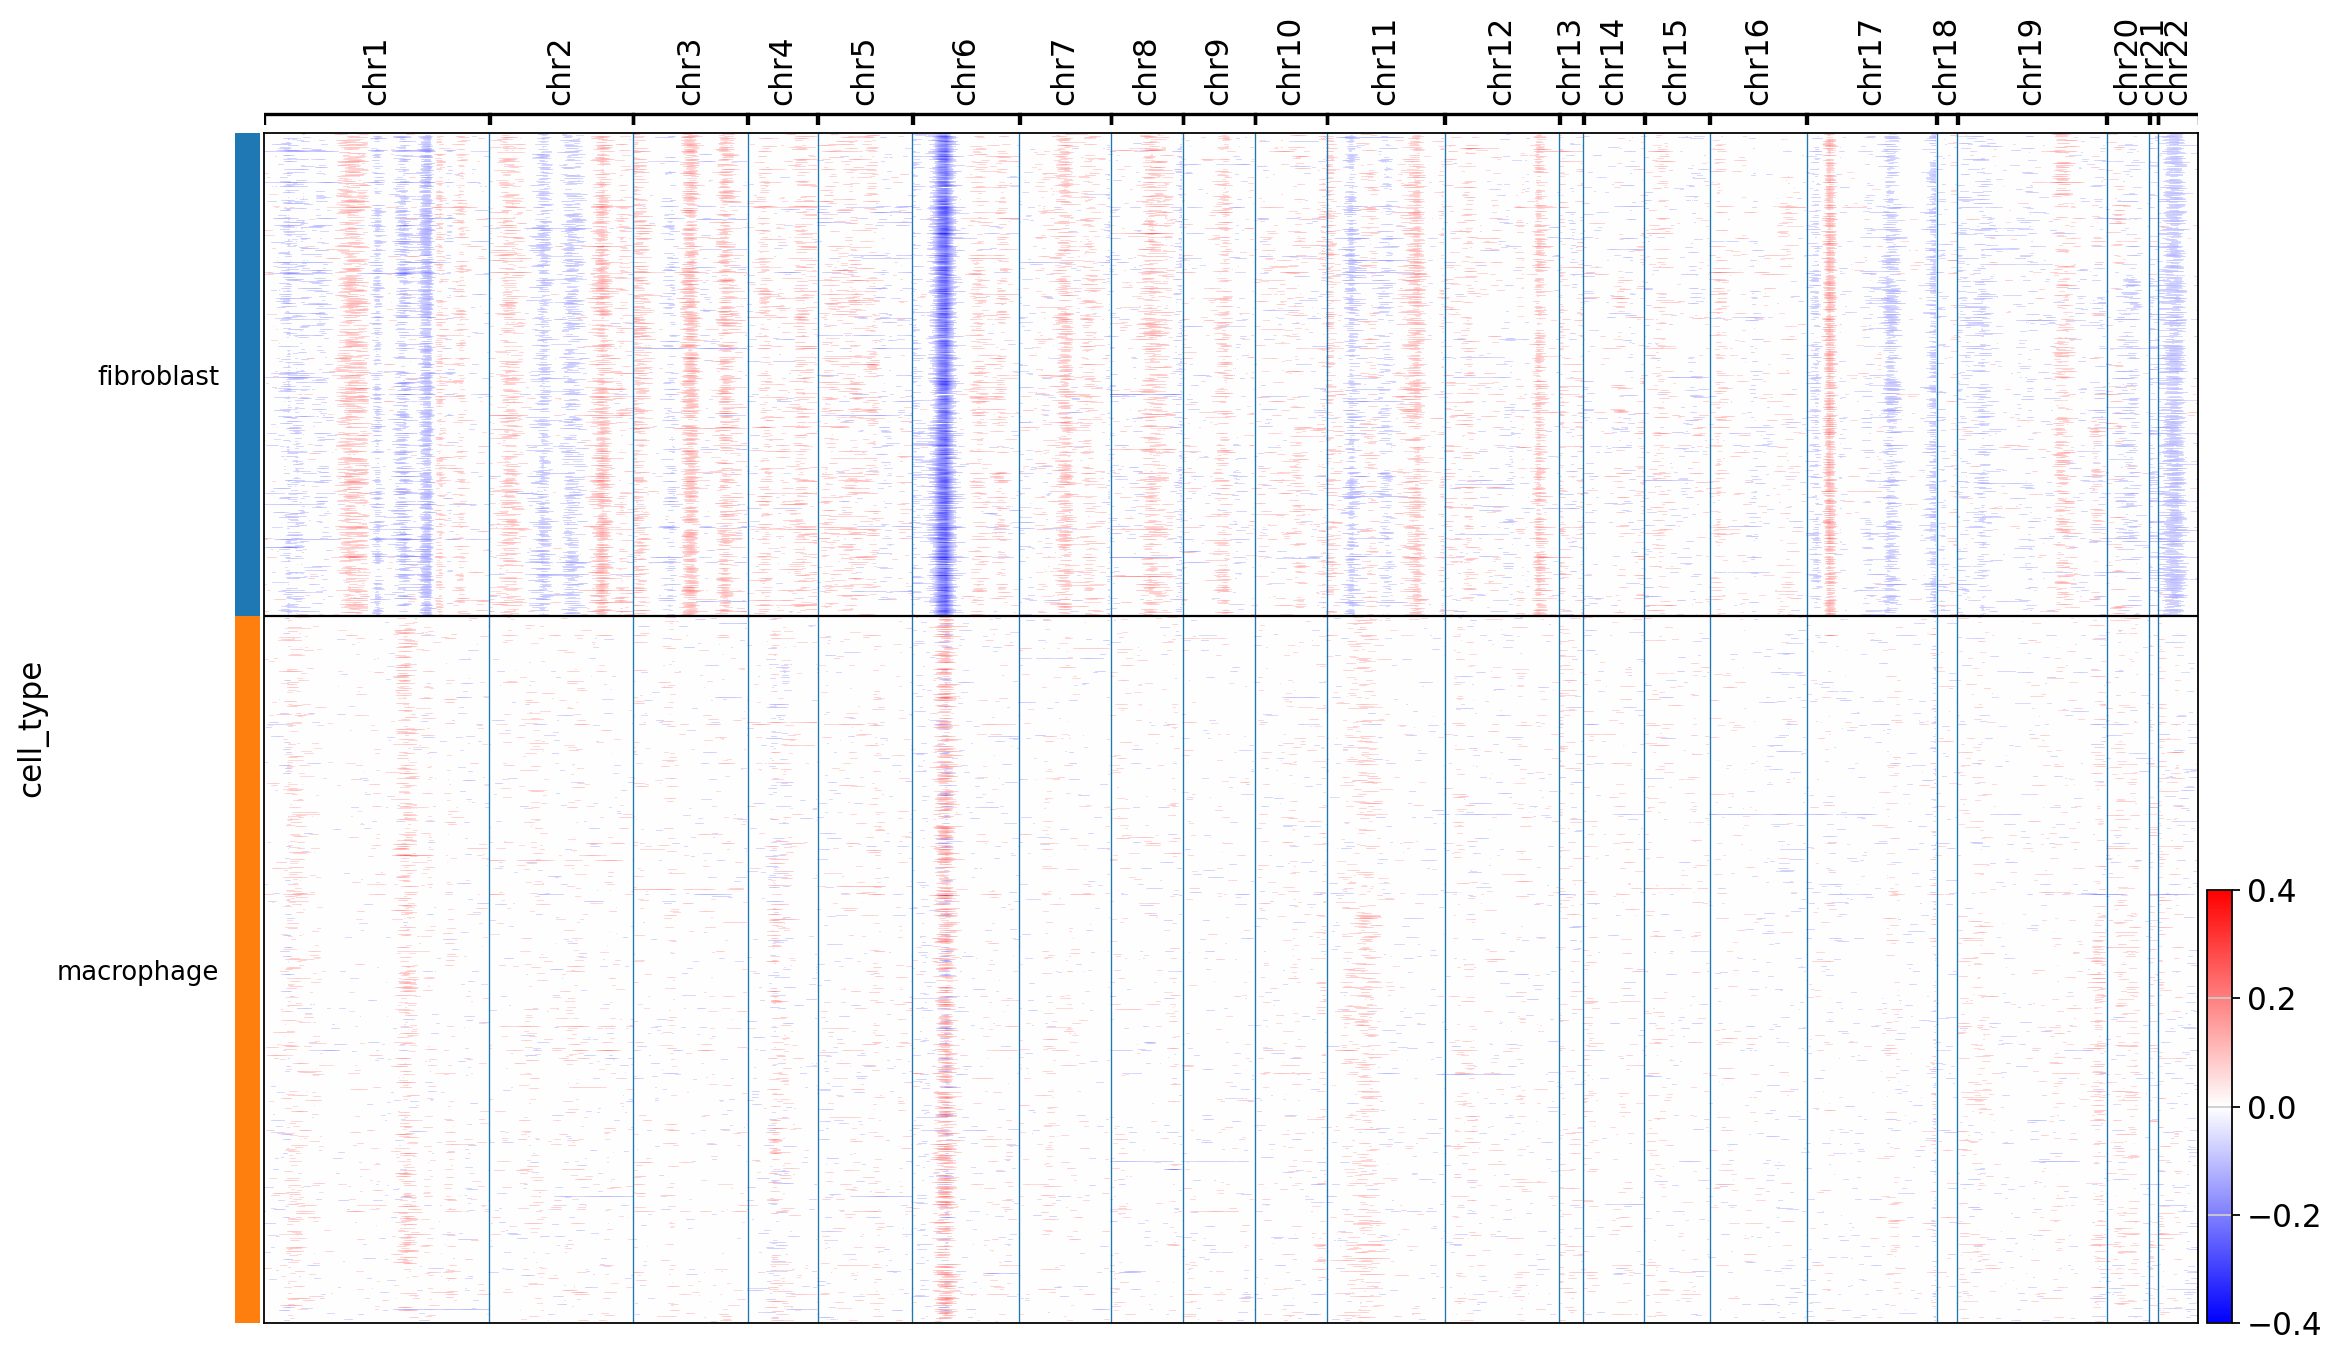

In [35]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type", vmin=-0.4, vmax=0.4)

In [36]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

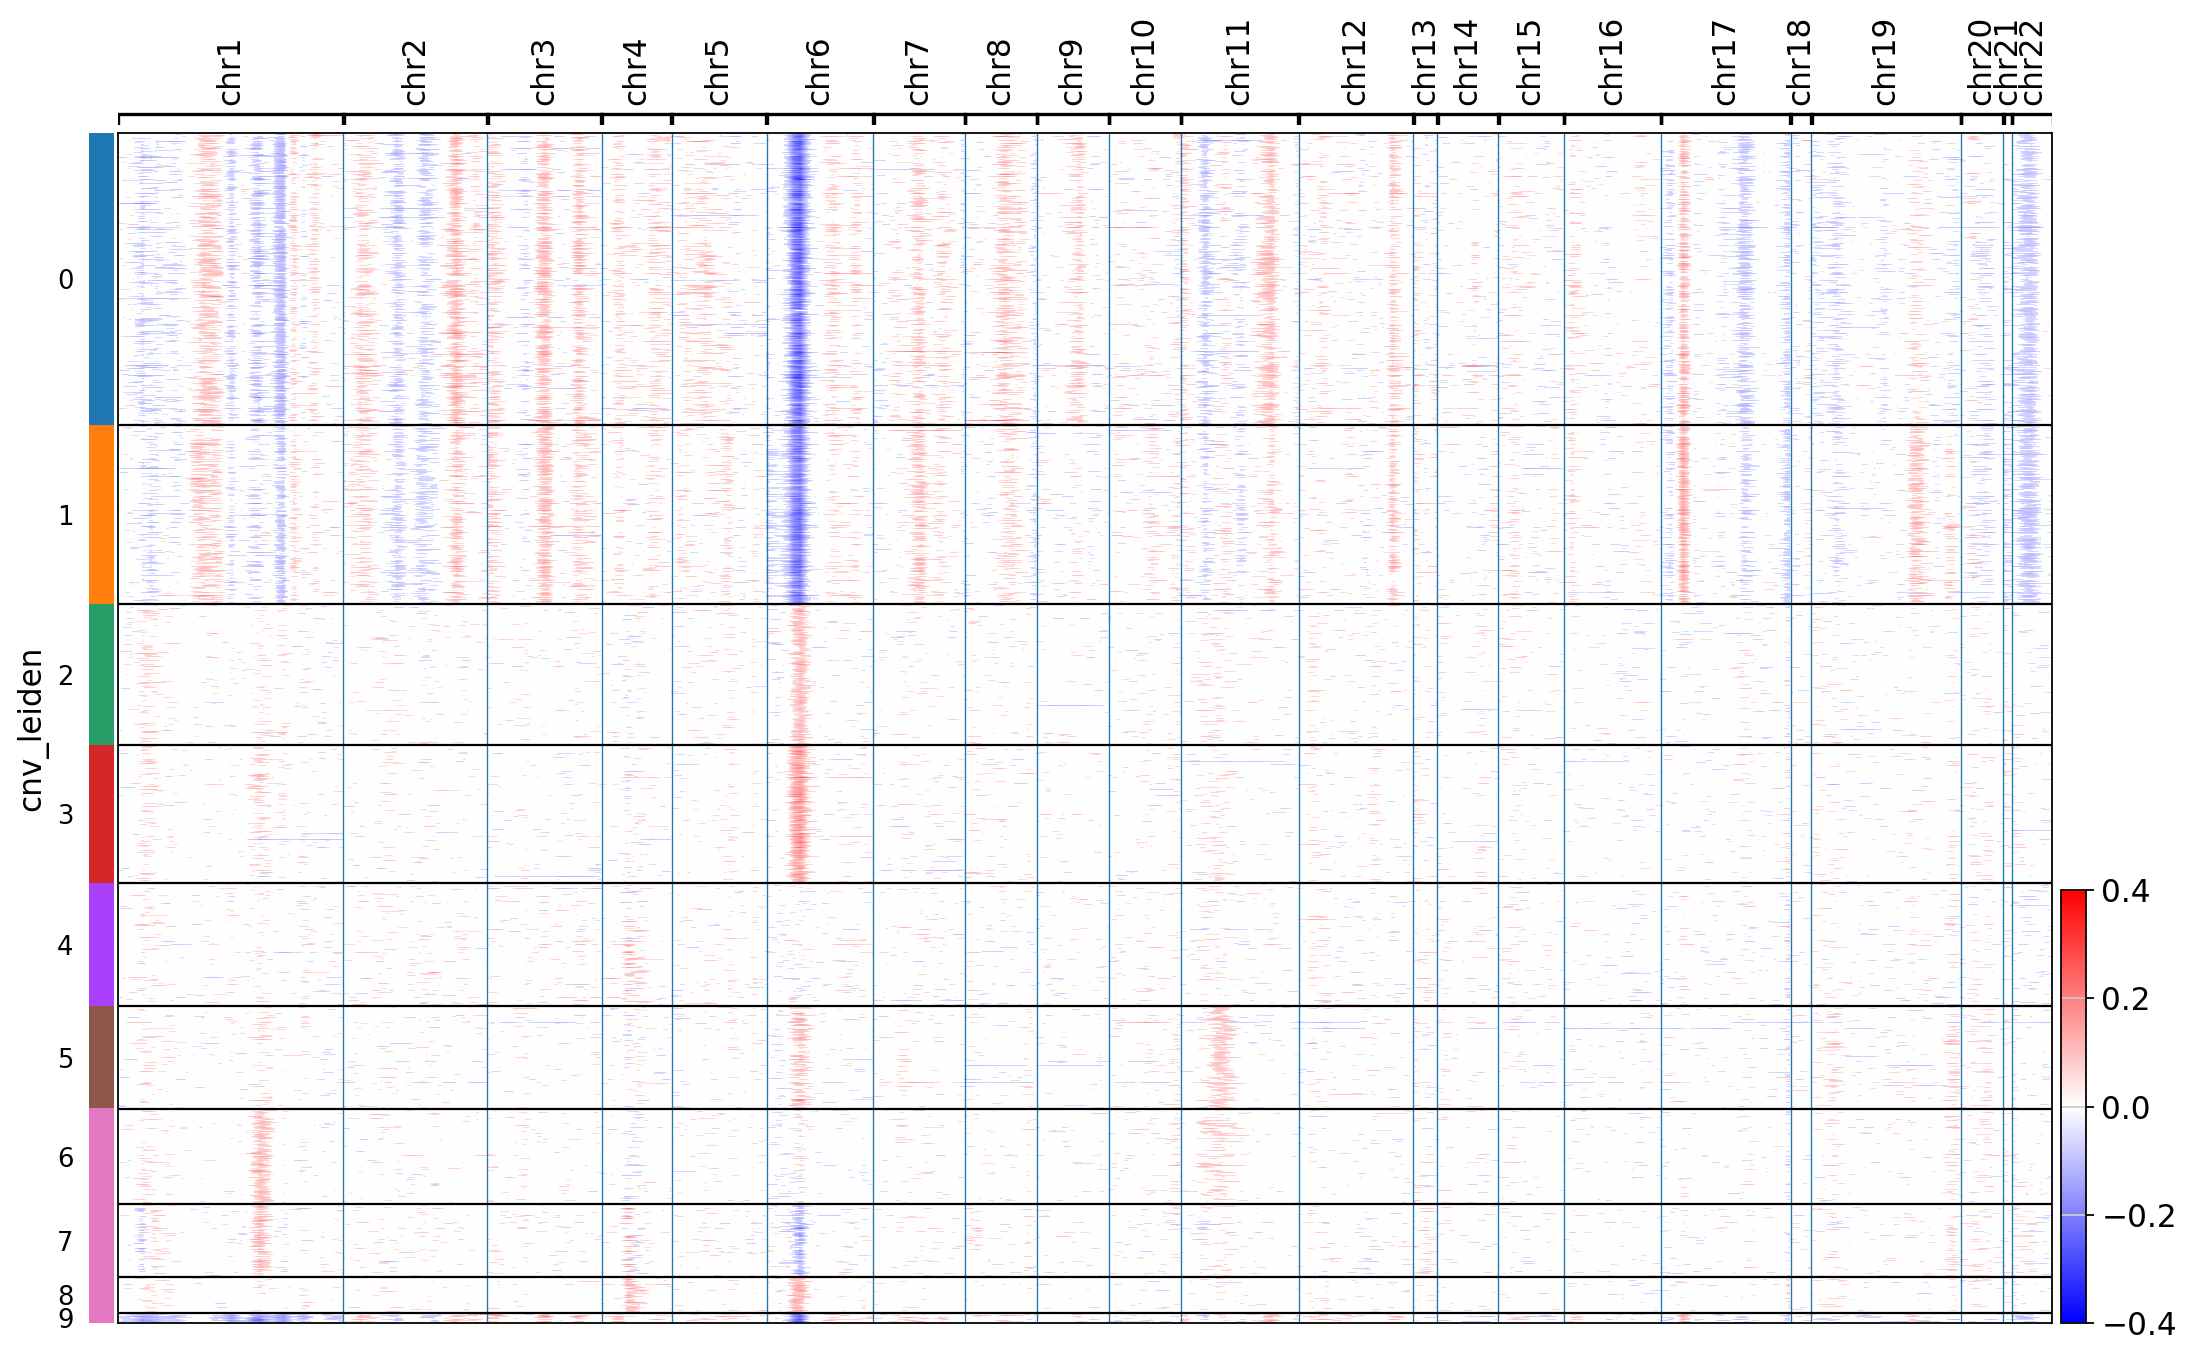

In [41]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", vmin=-0.4, vmax=0.4)

... storing 'cnv_leiden' as categorical


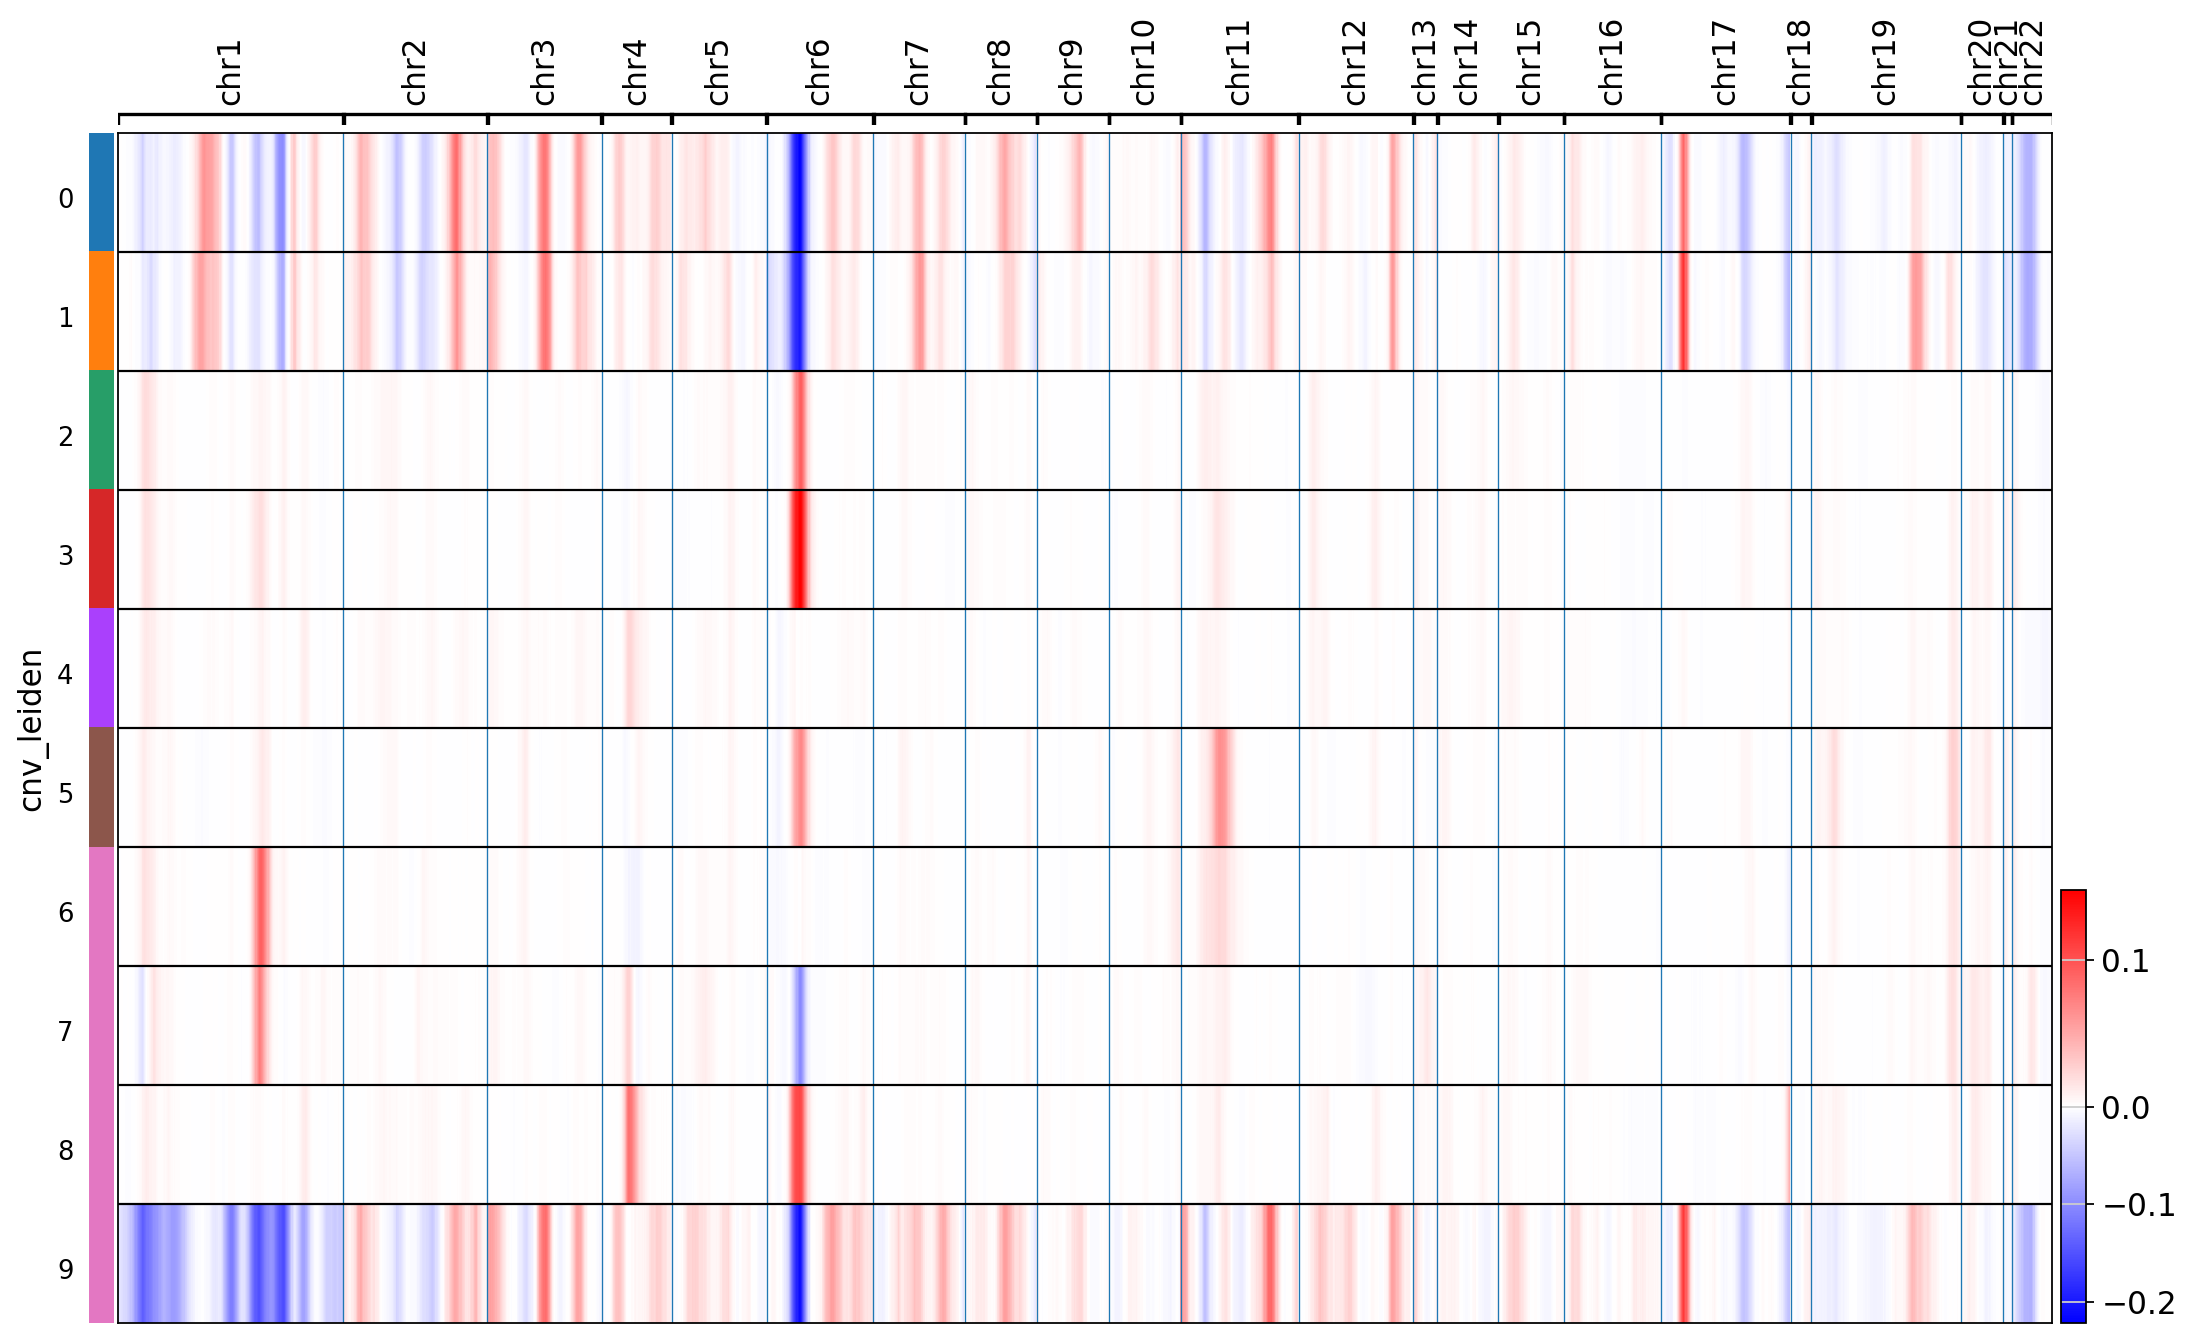

In [42]:
cnv.pl.chromosome_heatmap_summary(adata, groupby='cnv_leiden')

... storing 'cell_type' as categorical


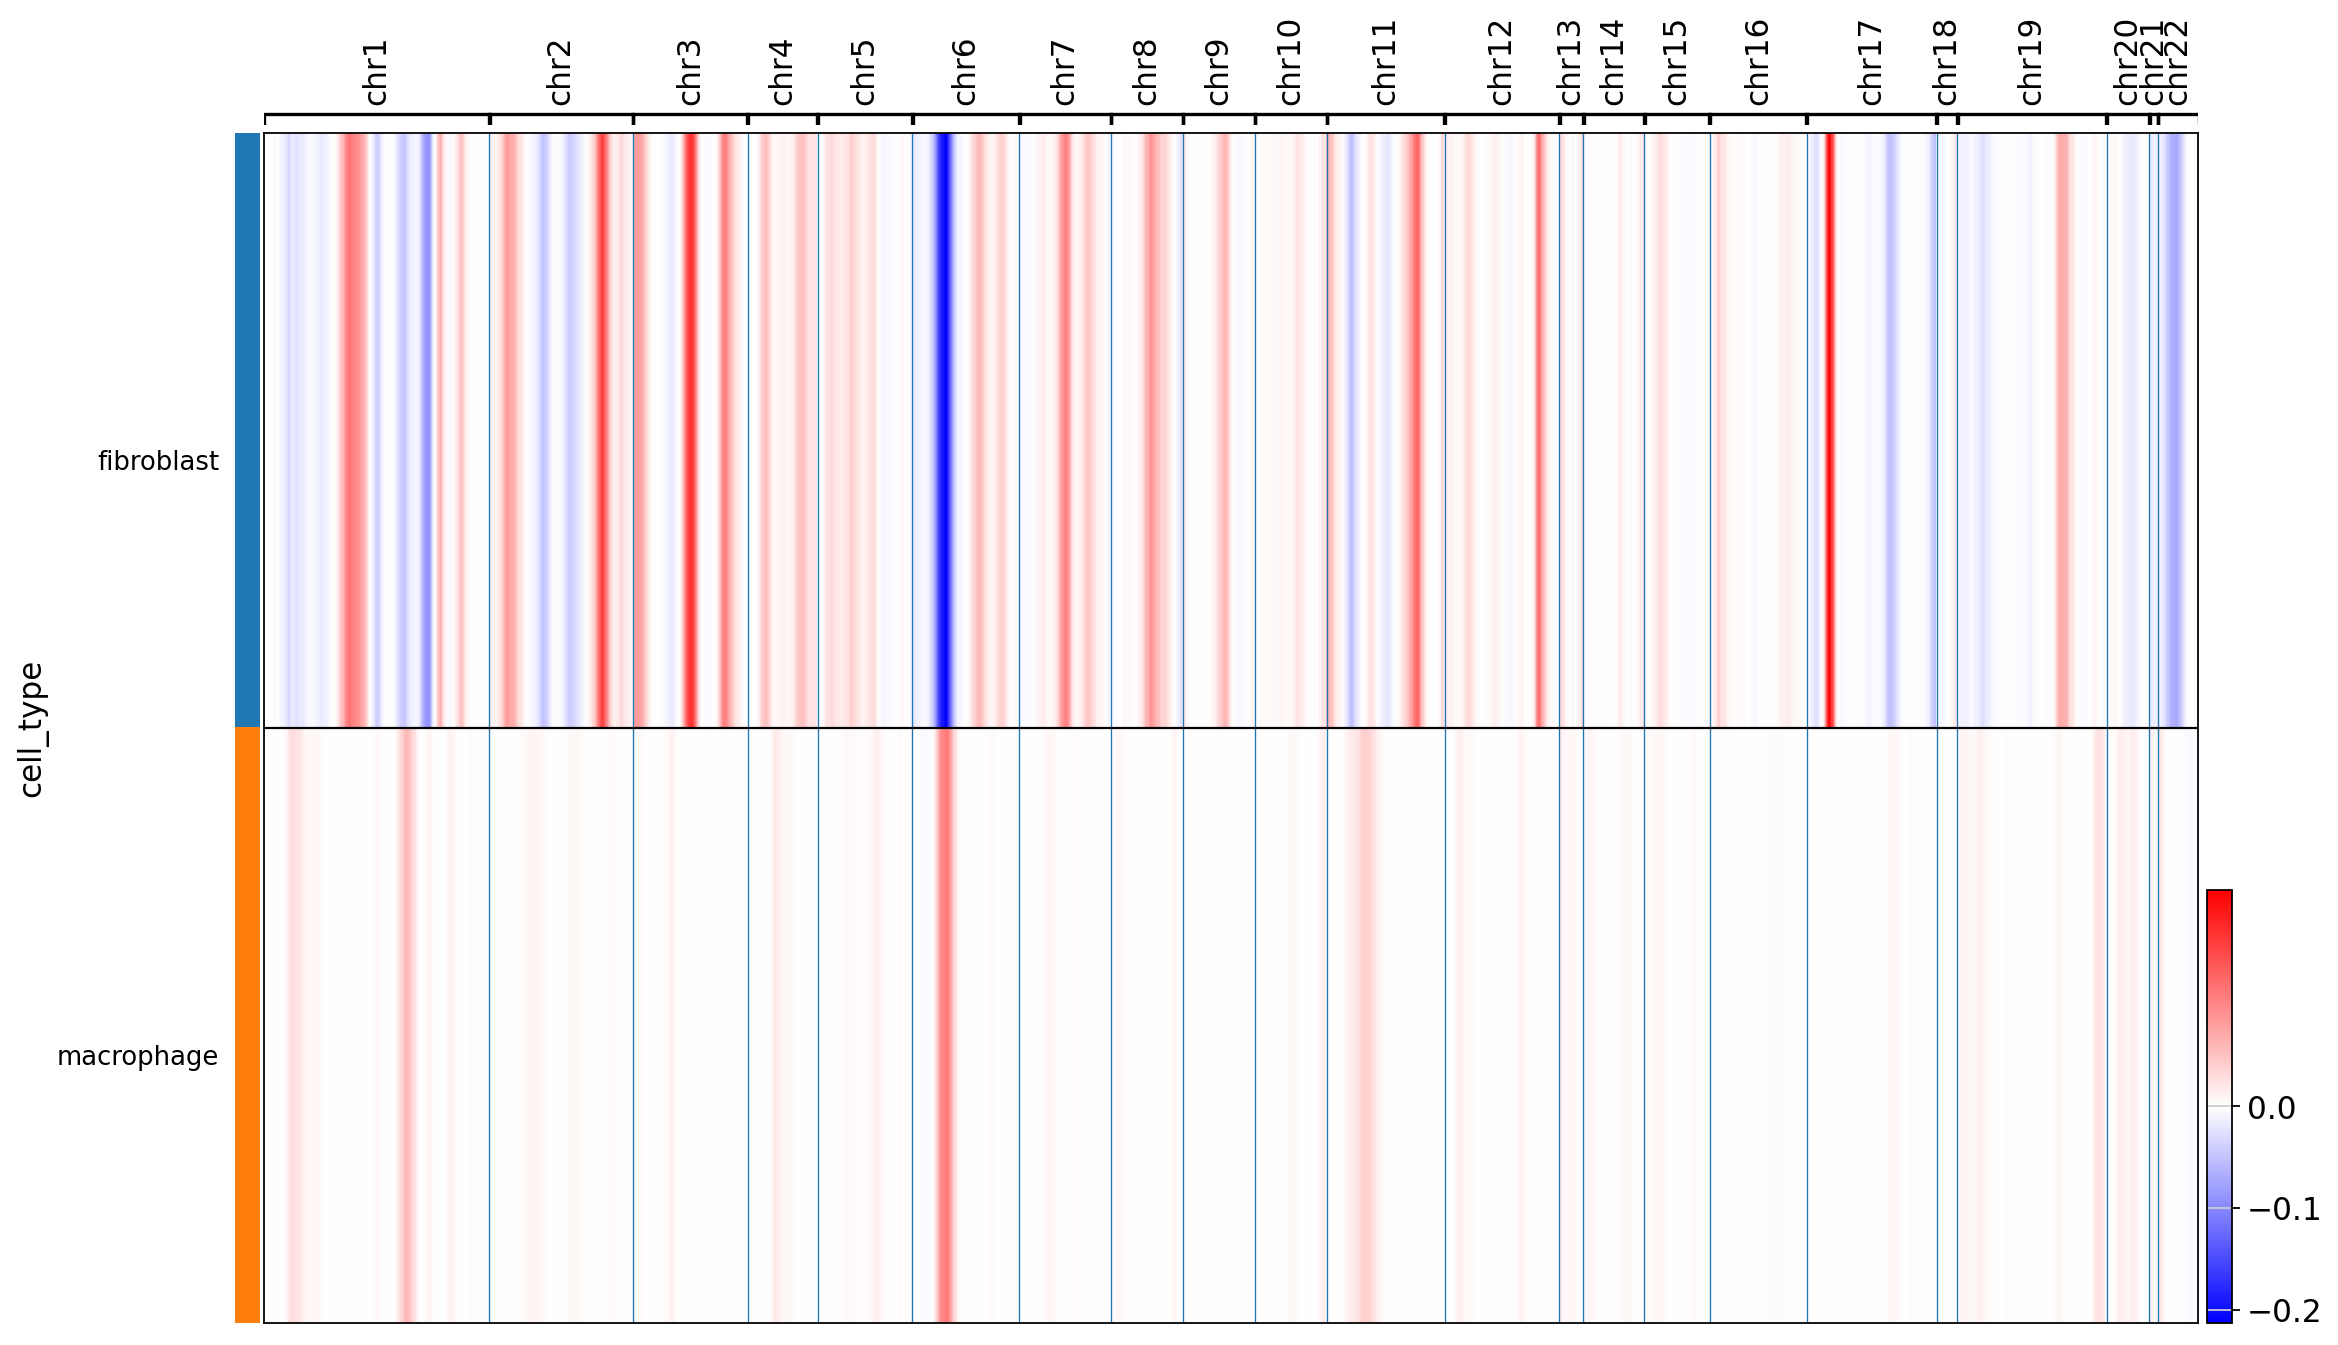

In [43]:
cnv.pl.chromosome_heatmap_summary(adata, groupby='cell_type')

In [33]:
adata

AnnData object with n_obs × n_vars = 6184 × 22798
    obs: 'mapped_reference_annotation', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


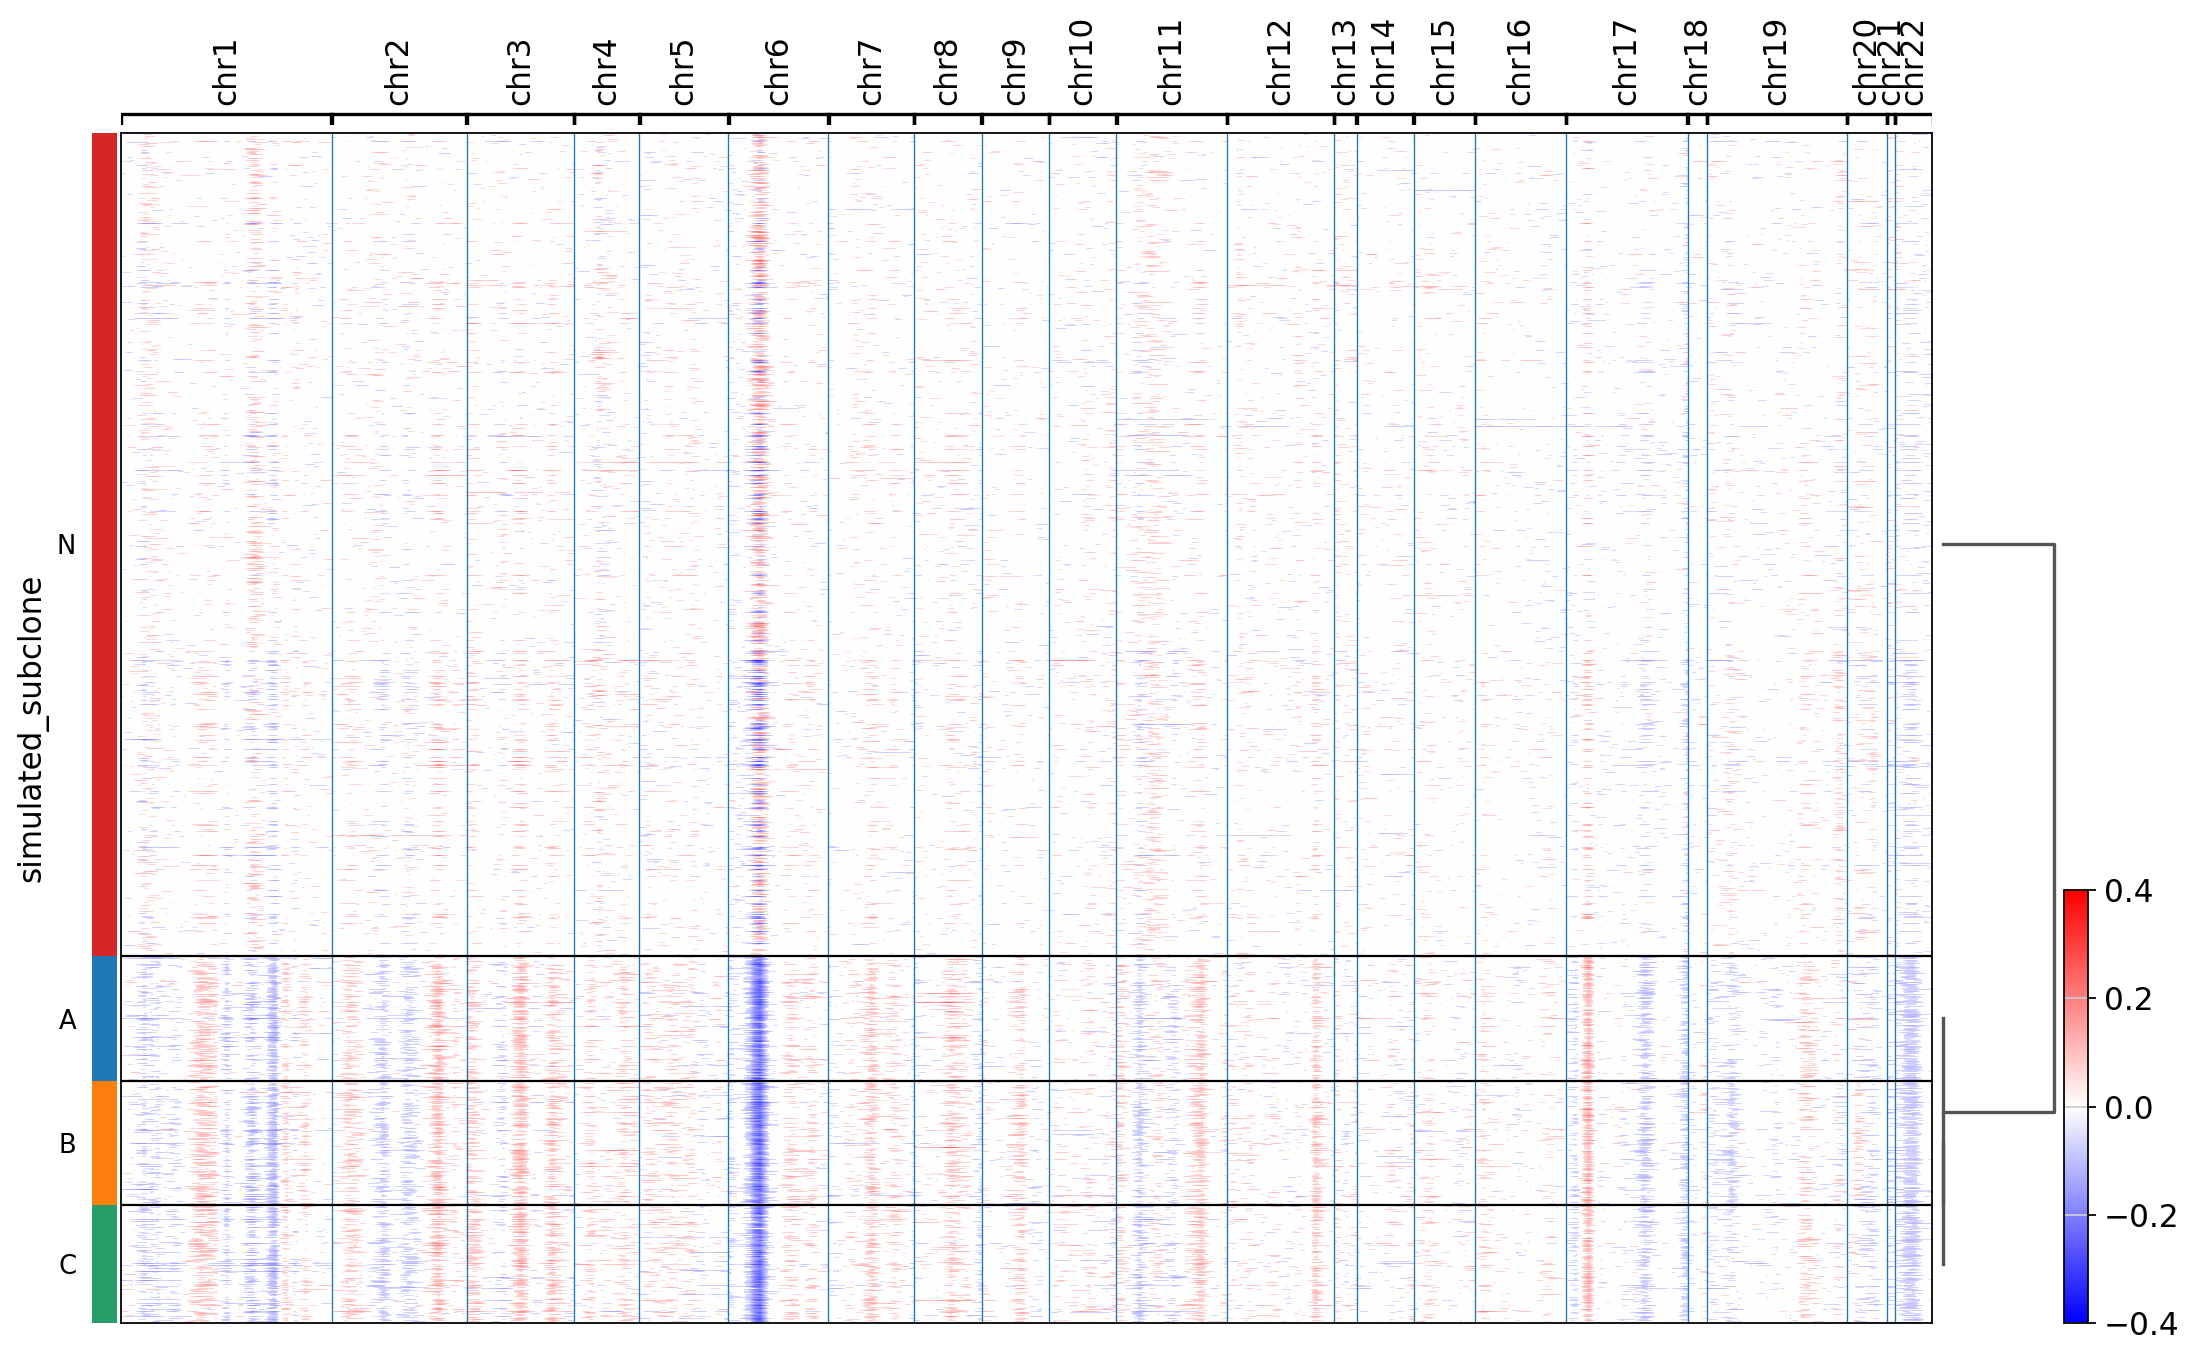

In [44]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True, vmin=-0.4, vmax=0.4)

### Counts

In [45]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer='counts',
    # reference_key="cell_type",
    # reference_cat="macrophage",
    window_size=200
)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.09s/it]


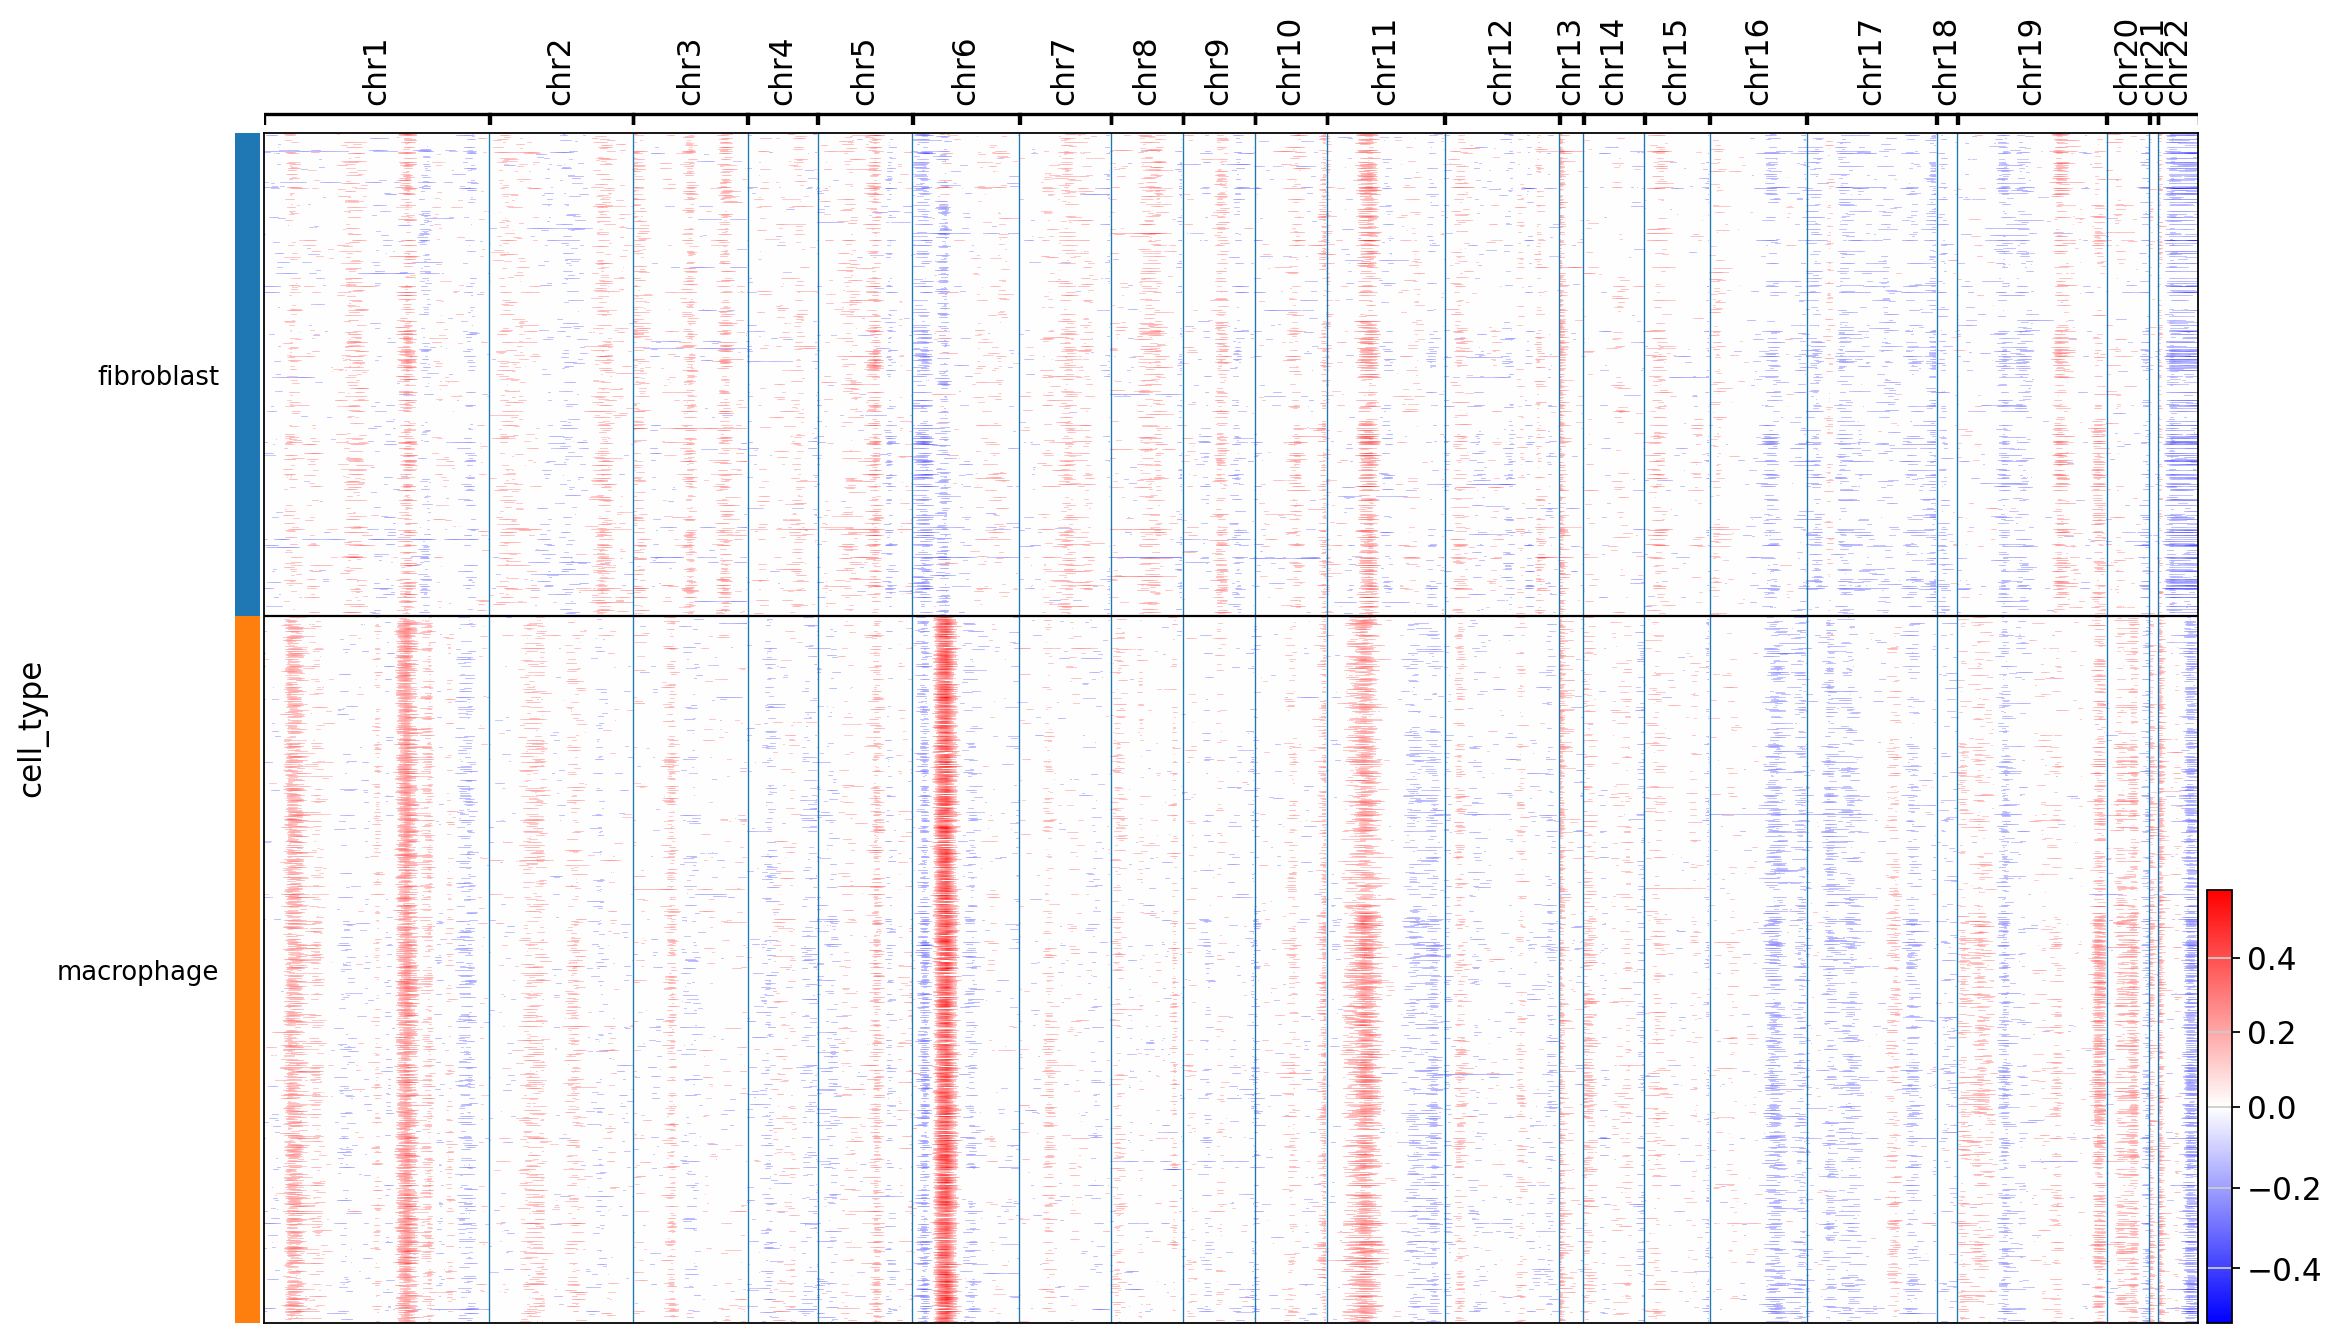

In [46]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type")

... storing 'cell_type' as categorical


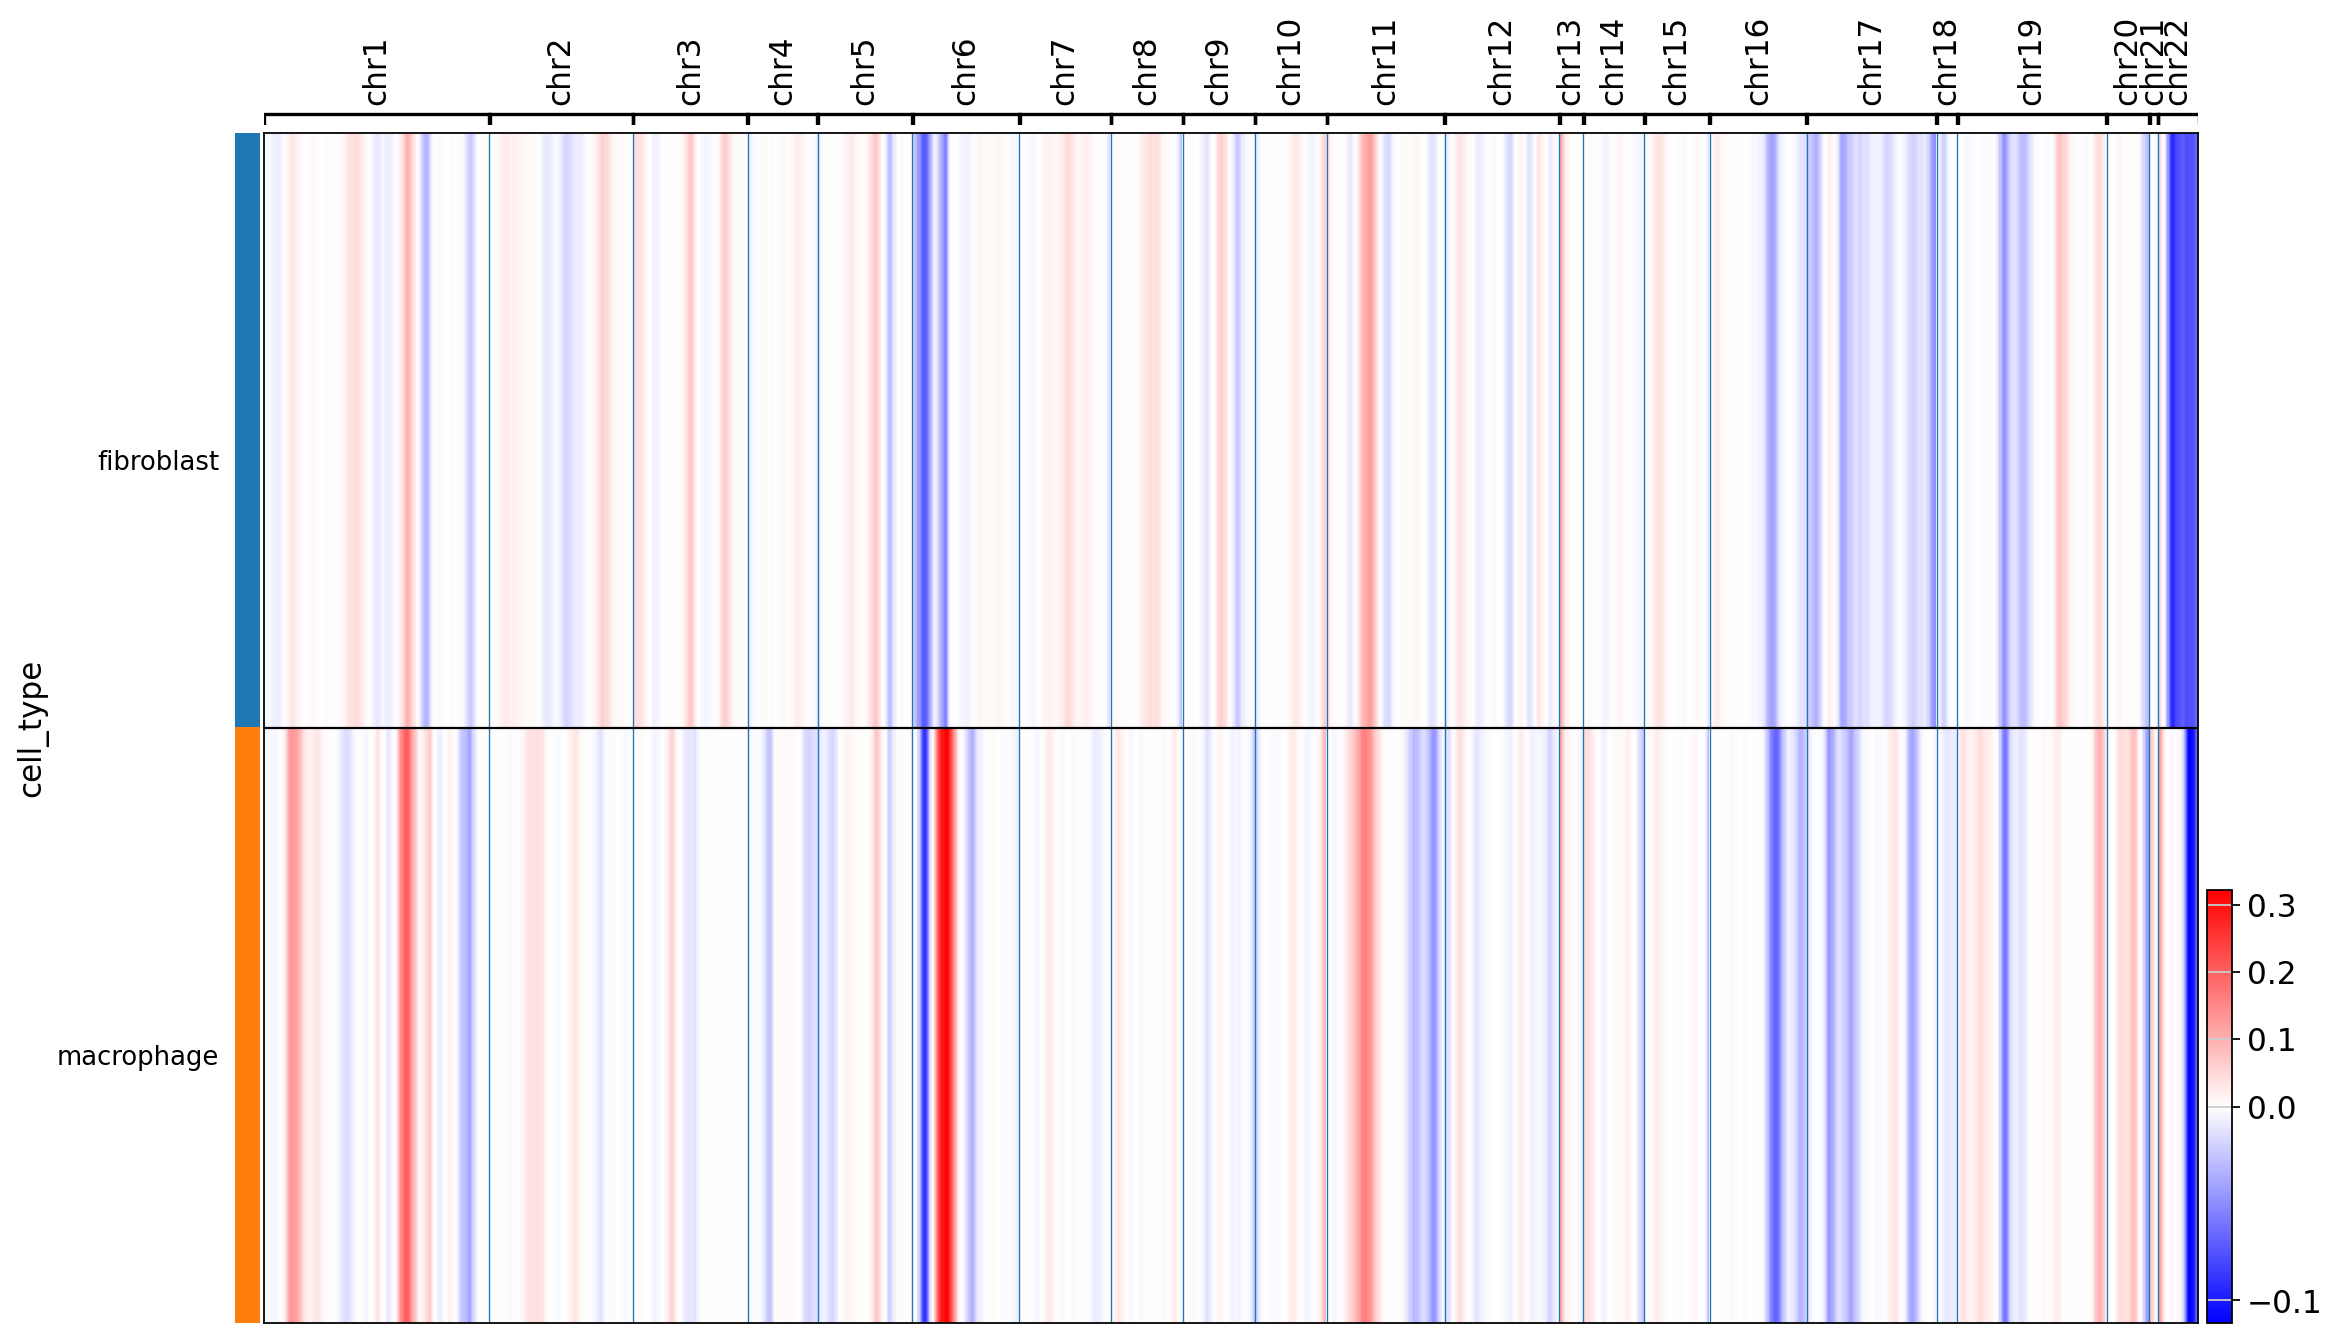

In [49]:
cnv.pl.chromosome_heatmap_summary(adata, groupby='cell_type')

In [31]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


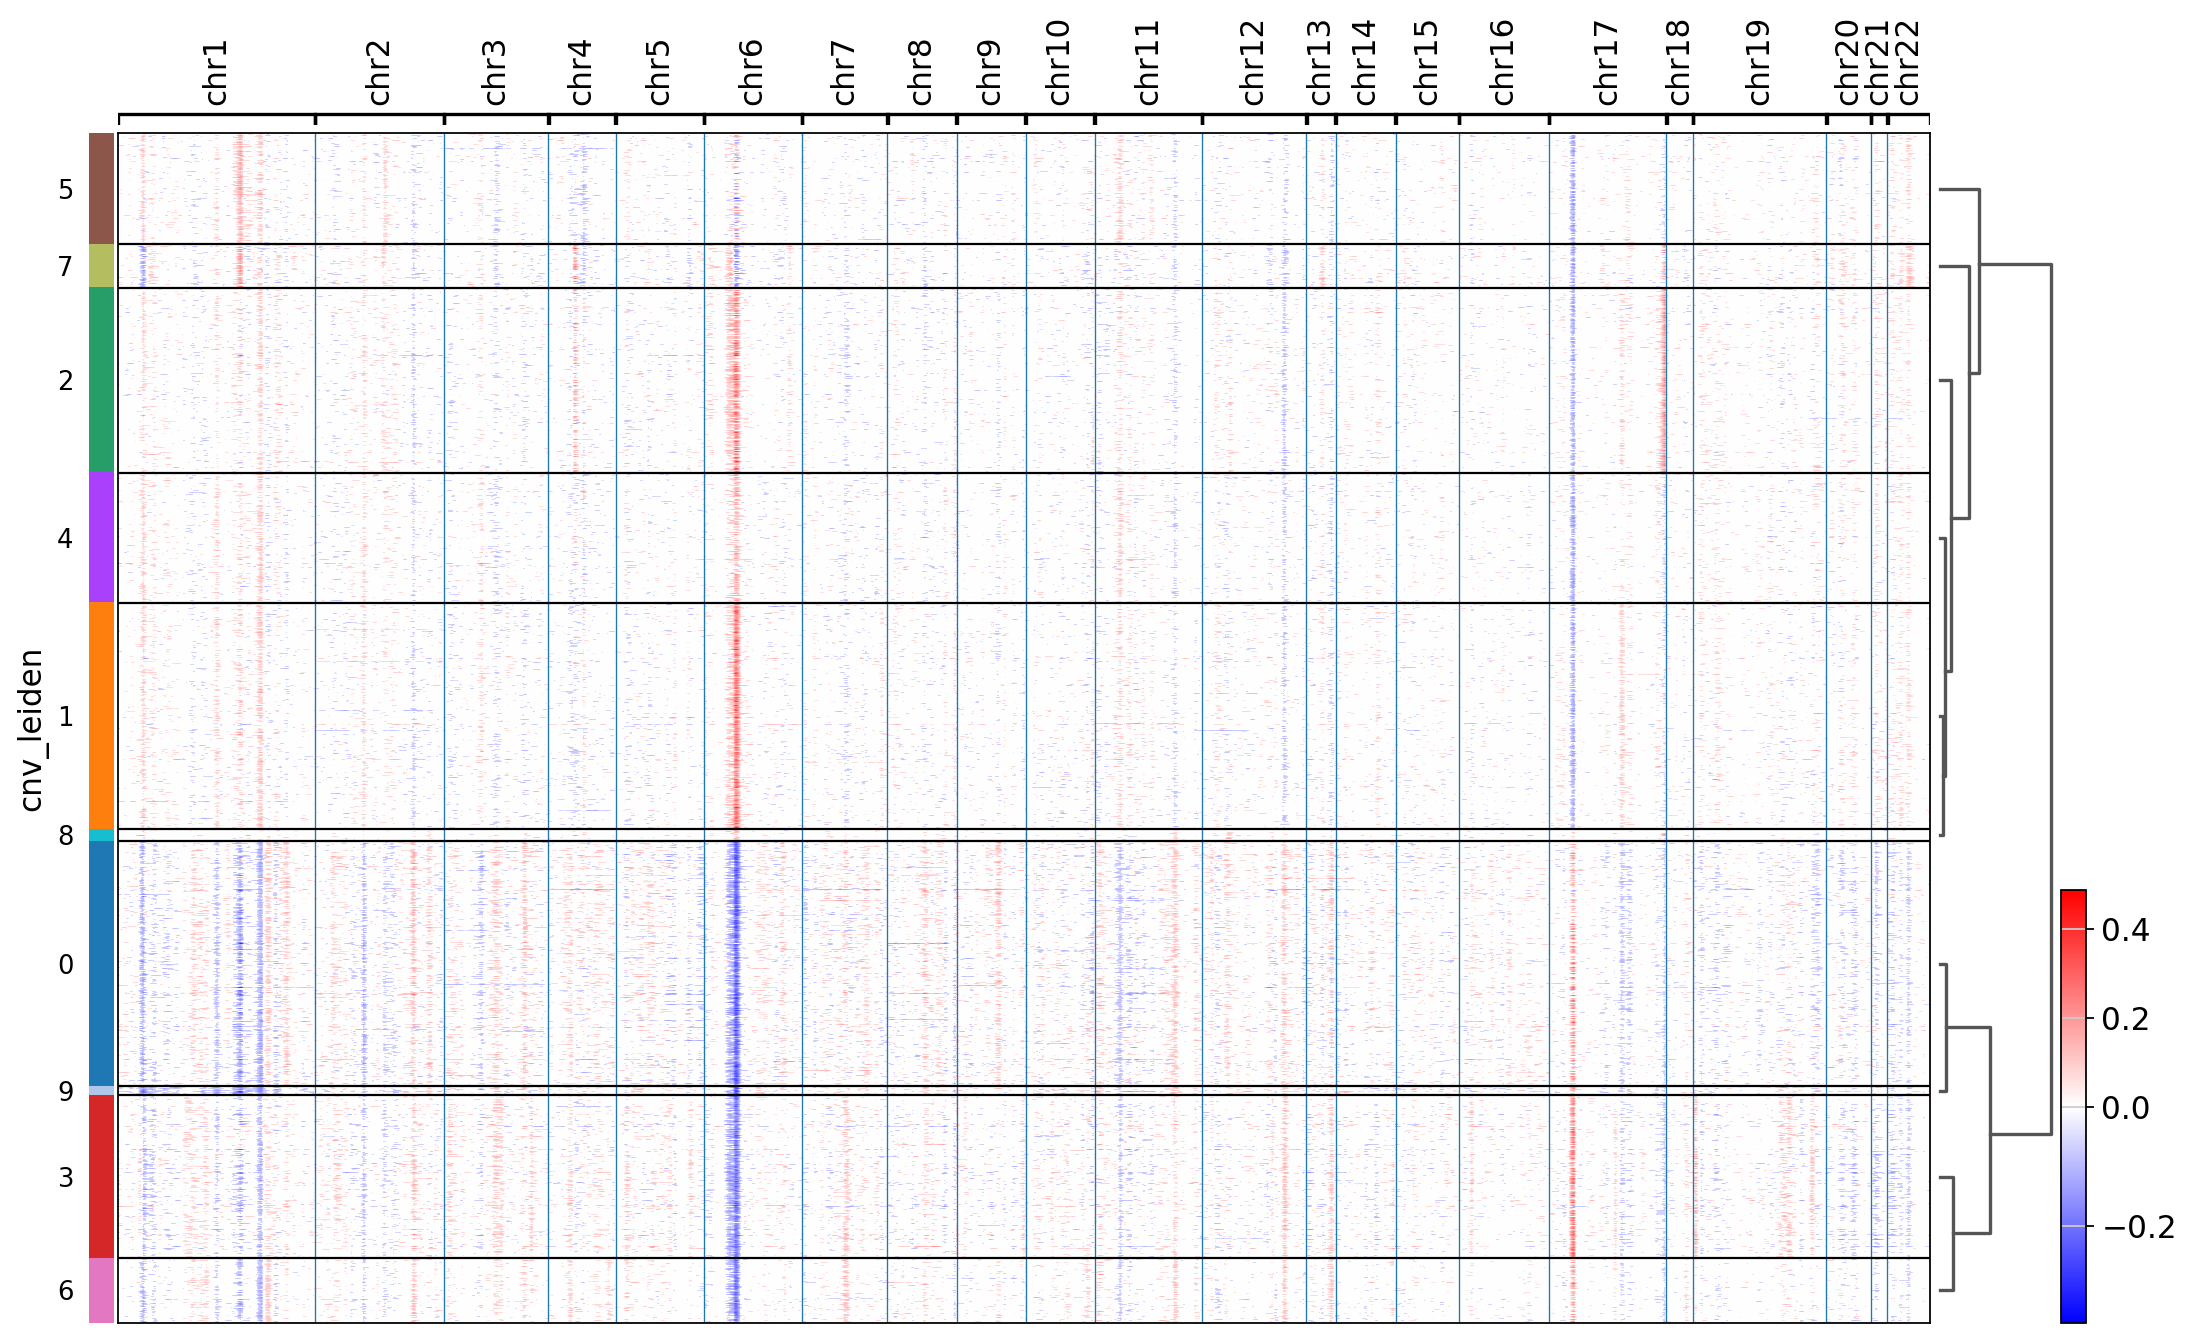

In [32]:
sc.tl.dendrogram(adata,groupby="cnv_leiden")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

categories: A, B, C, etc.
var_group_labels: chr1, chr2, chr3, etc.


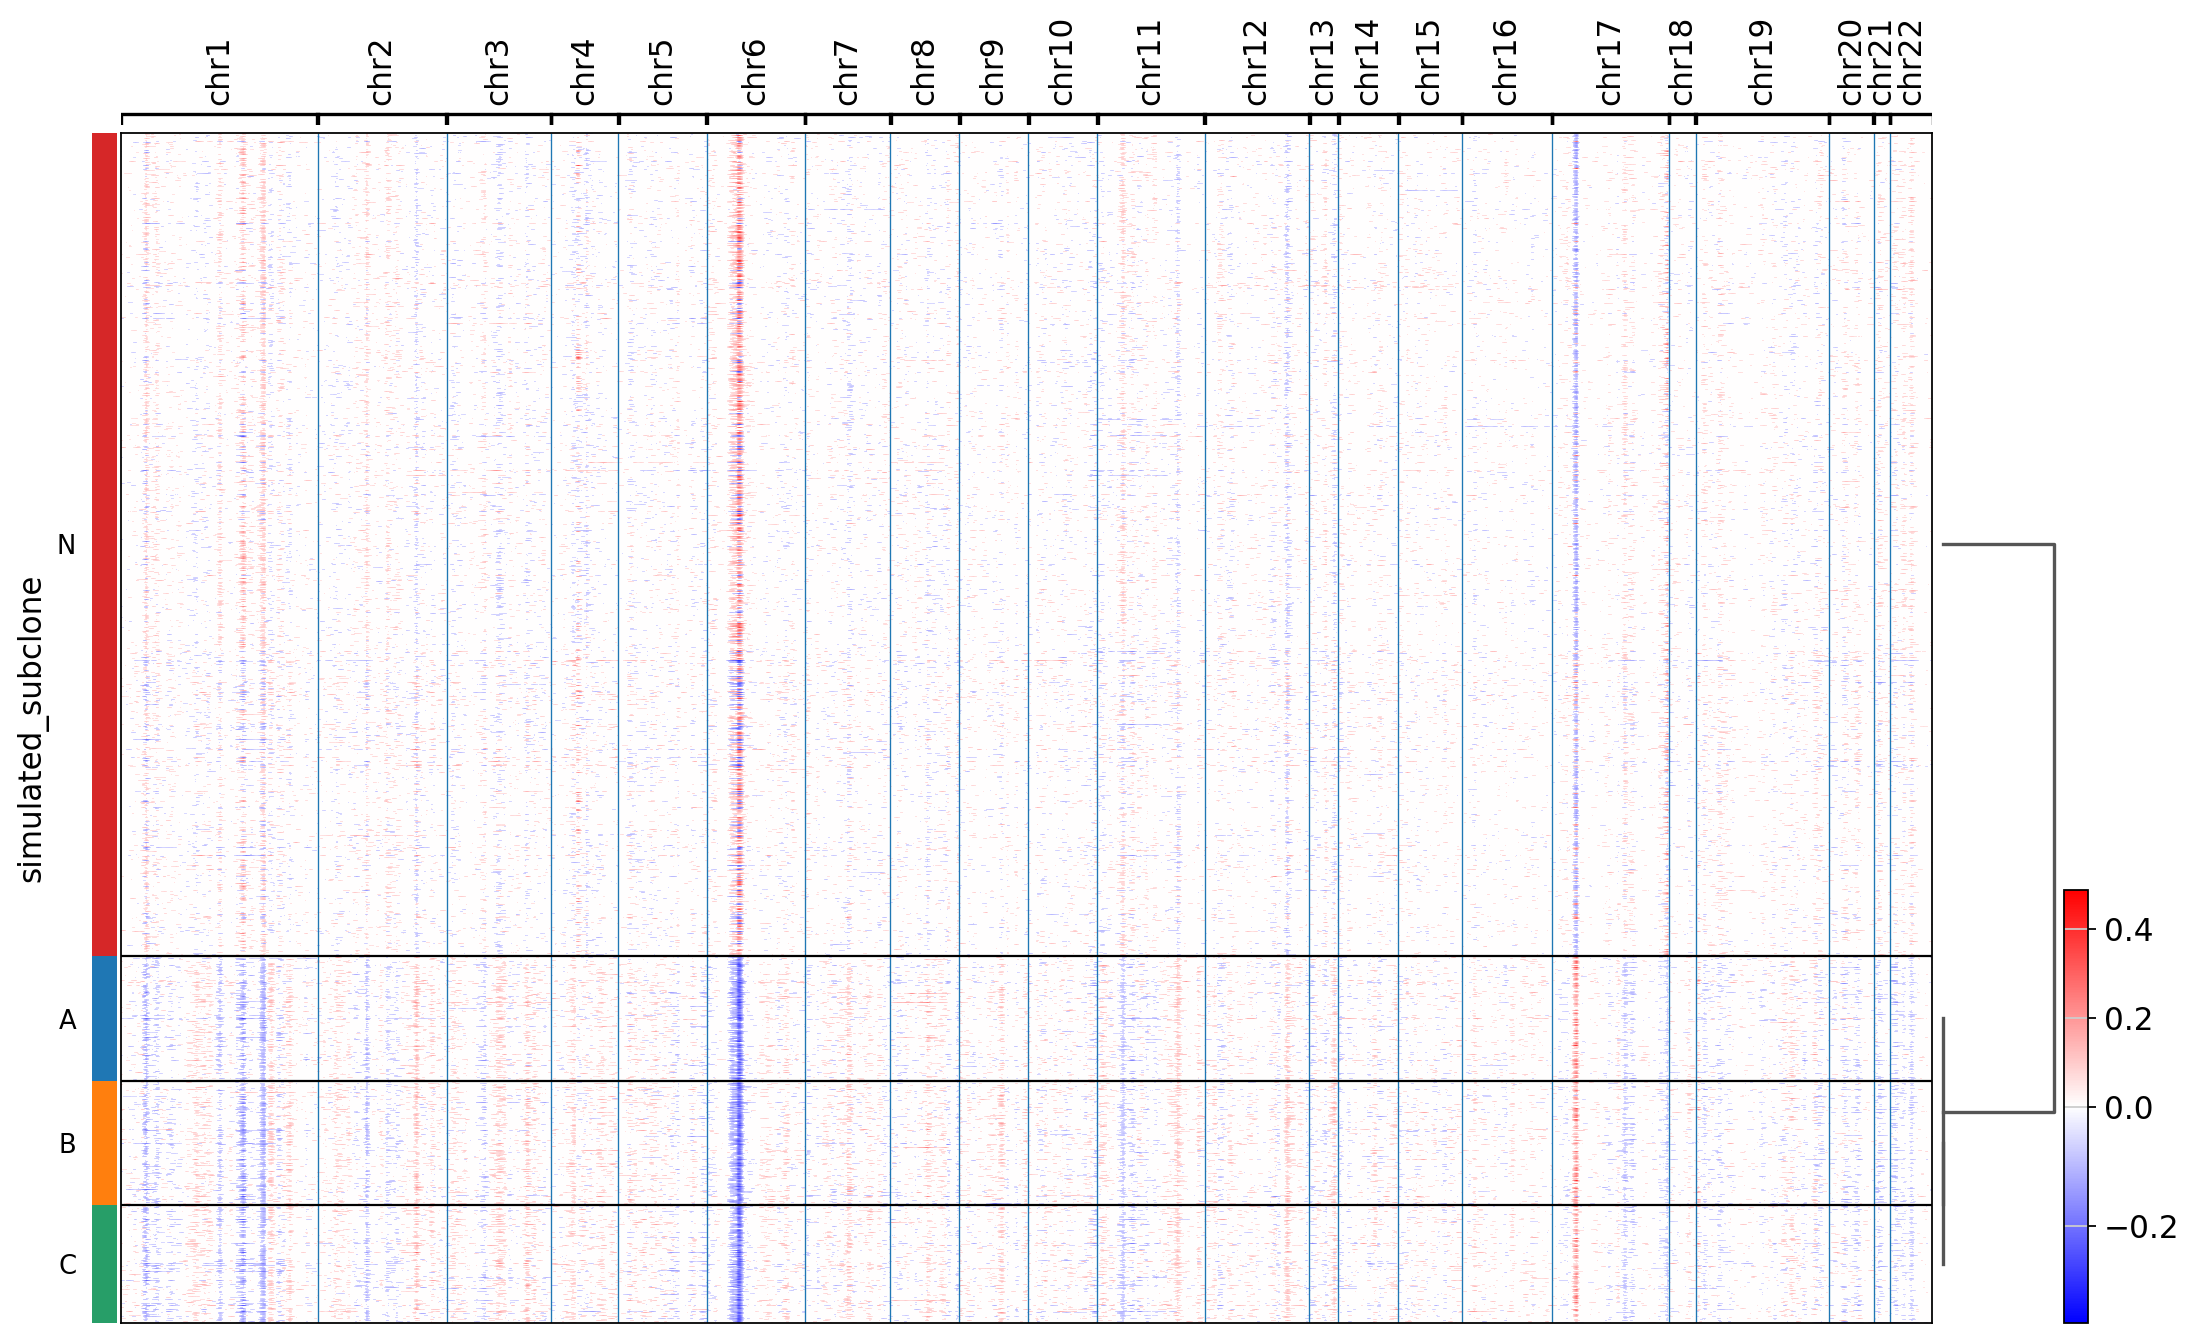

In [33]:
sc.tl.dendrogram(adata,groupby="simulated_subclone")
cnv.pl.chromosome_heatmap(adata, groupby="simulated_subclone", dendrogram=True)